# Table of contents
1. [Introduction](#introduction)

2. [Data Exploration](#DataExploration)
    1. [The goal](#Thegoal)
    2. [The code](#Thecode)
    3. [The outcome](#Theoutcome)
    
3. [Data Preprocessing](#DataPreprocessing)
    1. [The goal](#Thegoal)
    2. [The code](#Thecode)
    3. [The outcome](#Theoutcome)
    
4. [Feature Engineering and Feature Selection](#FEFS)
    1. [The goal](#Thegoal)
    2. [The code](#Thecode)
    3. [The outcome](#Theoutcome)
    
5. [Select, Train, Apply ML models](#SA)
    1. [The goal](#Thegoal)
    2. [The code](#Thecode)
    3. [The outcome](#Theoutcome)
    
6. [Evaluation](#Evaluation)
    1. [The goal](#Thegoal)
    2. [The code](#Thecode)
    3. [The outcome](#Theoutcome)
    
7. [Communicate Results](#CommunicateResults)
8. [Ethics](#Ethics)
9. [References](#References)

## Introduction <a name="introduction"></a>

<b>Problem statement</b><br/>
The Requirements for this assessment: 
1. Based on the given dataset of <b>Higher Education Students Performance Evaluation data</b>, identify stakeholders/audiences who could benefit from your study. 
2. Setup your goal together with relevant research questions and choose appropriate machine learning methods to achieve your goal. Deliver your findings to your stakeholders/ audiences with critical insights.
3. Basically, follow machine learning pipeline, after EDA and Preprocessing, select, train, apply, evaluate and present at least two models using different machine learning techniques. 
4. Describe and justify the selection of any appropriate hyper-parameters for each model. Compare the performances of the models. Along with the code cells (preferably with comments), you should use the appropriate markdown cells in the notebook to describe and justify your work. Bonus: Explore and innovate new method(s) that cannot be found in literature.

<b>Literature Review</b><br/>
The IBM define Machine learning(ML) as a subfield of Artificial Intelligence (AI) which uses data and algorithms to imitate the human behaviour and gradually improve its accuracy (IBM,2023). In modern day, machine learning is used in almost every industry. For example, Netflix uses ML to recommend movies/tv-series and facebook uses ML to show ads the user may like. There're three primary types of ML models: Supervised ML, Unsupervised ML and Semi-supervised ML. And there's a number of machine learning algorithms: Logistic Regression, Decision trees, Random forests and Neural Networks etc.

This study uses Supervised ML to generate and predict student results based on students performance for different courses using the above mentioned algorithms.

The given dataset of Higher Education Students Performance Evaluation data consists of 33 variables, which are questions asked from students about their personal, family and educational background. After briefly exploring the dataset I've identified few stakeholers who might be interested in the student performance during the <b>data explorations</b> stage. Those stakeholders are:
- Educational Institutions
- Educational Technology Providers
- Teachers or Instructors
- Researchers and Analysts
- Parents and guardians

The target is the <b>OUTPUT Grade</b> as identified in the dataset. It is also important to note that all the features are <b>categorical</b>. 

<b>Research Questions</b>
<ul>
    <li>How to deal with the data imbalance in certain features?</li>
    <li>Will feature reduction improve the accuracy?</li>
    <li>What is the best fitting model out of Logistic Regression, Random Forest Search, Decision Tree, KNN, and SVM?</li>
    <li>Does this study comply with ethical usage of data and information?</li>
</ul>

## Data Exploration <a name="DataExploration"></a>
During the data exploration stage of the dataset of Higher Education Students Performance Evaluation, I've identified and selected five possible stakeholders and the variables they might be interested in.

1. <b>Educational Institutions</b> can use the student data to analyze the student performance and engagement to make decisions related to improving the course quality and allocate resources effectively to increase the student outcome.

2. <b>Educational Technology Providers</b> may be interested in developing solutions that can enhance student learning performance and engagement and overall educational experience.

3. <b>Teachers or Instructors</b> can use these data to understand students better, tailor their teaching methods and identify potentional areas for imporvement in their courses and learning materials.

4. <b>Researchers and Analysts</b> can study the impact of various factors on students' success and identify students behaviour and patterns.

5. <b>Parents and guardians</b> may want to know the children's progess and academic performance and how it correlates with the attendance.

### The goal <a name="Thegoal"></a>
The goal in the data exploration stage is to explore student dataset and identify possible data patterns and the possible stakeholders and features they might be interested in before moving in to the data preprocession.

### The code <a name="Thecode"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings

# Modules and frameworks imported
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import copy
import sklearn
%matplotlib inline

In [2]:
# Import the dataset and get a overall view
student_data = pd.read_csv('../Dataset/DATA_adapted.csv')
student_data.head() # first 5 rows

Student ID  1- Student Age  2- Sex  3- Graduated high-school type  \
0   STUDENT1             2.0       2                              3   
1   STUDENT2             2.0       2                              3   
2   STUDENT3             2.0       2                              2   
3   STUDENT4             1.0       1                              1   
4   STUDENT5             NaN       2                              1   

   4- Scholarship type  5- Additional work  \
0                    3                   1   
1                    3                   1   
2                    3                   2   
3                    3                   1   
4                    3                   2   

   6- Regular artistic or sports activity  7- Do you have a partner  \
0                                       2                         2   
1                                       2                         2   
2                                       2                         2   
3                                       2                         1   
4                                       2                         1   

   8- Total salary  9- Transportation to the university  ...  \
0                1                                    1  ...   
1                1                                    1  ...   
2                2                                    4  ...   
3                2                                    1  ...   
4                3                                    1  ...   

   23- Preparation to midterm exams(1: alone 2: with friends 3: not applicable)  \
0                                                  1                              
1                                                  1                              
2                                                  1                              
3                                                  1                              
4                                                  2                              

   24- Preparation to midterm exams(1: closest date to the exam 2: regularly during the semester 3: never)  \
0                                                  1                                                         
1                                                  1                                                         
2                                                  1                                                         
3                                                  2                                                         
4                                                  1                                                         

   25- Taking notes in classes  26- Listening in classes  \
0                            3                         2   
1                            3                         2   
2                            2                         2   
3                            3                         2   
4                            2                         2   

   27- Discussion improves my interest and success in the course  \
0                                                  1               
1                                                  3               
2                                                  1               
3                                                  2               
4                                                  2               

   28- Flip-classroom  \
0                   2   
1                   2   
2                   1   
3                   1   
4                   1   

   29- Cumulative grade point average in the last semester  \
0                                                  1         
1                                                  2         
2                                                  2         
3                                                  3         
4                                                  2         

   30- Expected Cumulative grade

In [3]:
student_data.columns # Display all the columns/features

Index(['Student ID', '1- Student Age', '2- Sex',
       '3- Graduated high-school type', '4- Scholarship type',
       '5- Additional work', '6- Regular artistic or sports activity',
       '7- Do you have a partner', '8- Total salary',
       '9- Transportation to the university', '10- Accommodation type',
       '11- Mothers education', '12- Father education',
       '13- Number of sistersbrothers', '14- Parental status',
       '15- Motheroccupation', '16- Fathersoccupation',
       '17- Weekly study hours',
       '18- Reading frequency (non-scientific books/journals)',
       '19- Reading frequency (scientific books/journals)',
       '20- Attendance to the seminarsconferences related to the department',
       '21- Impact of your projects on your success',
       '22- Attendance to classes',
       '23- Preparation to midterm exams(1: alone 2: with friends 3: not applicable)',
       '24- Preparation to midterm exams(1: closest date to the exam 2: regularly during the semester 3:

In [4]:
student_data.info() # count rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Student ID                                                                                               145 non-null    object 
 1   1- Student Age                                                                                           126 non-null    float64
 2   2- Sex                                                                                                   145 non-null    int64  
 3   3- Graduated high-school type                                                                            145 non-null    int64  
 4   4- Scholarship type                                                                   

In [5]:
student_data.describe() # Summary of all the features

1- Student Age      2- Sex  3- Graduated high-school type  \
count      126.000000  145.000000                     145.000000   
mean         1.611111    1.600000                       1.944828   
std          0.606264    0.491596                       0.537216   
min          1.000000    1.000000                       1.000000   
25%          1.000000    1.000000                       2.000000   
50%          2.000000    2.000000                       2.000000   
75%          2.000000    2.000000                       2.000000   
max          3.000000    2.000000                       3.000000   

       4- Scholarship type  5- Additional work  \
count           145.000000          145.000000   
mean              3.572414            1.662069   
std               0.805750            0.474644   
min               1.000000            1.000000   
25%               3.000000            1.000000   
50%               3.000000            2.000000   
75%               4.000000            2.000000   
max               5.000000            2.000000   

       6- Regular artistic or sports activity  7- Do you have a partner  \
count                              145.000000                145.000000   
mean                                 1.600000                  1.579310   
std                                  0.491596                  0.495381   
min                                  1.000000                  1.000000   
25%                                  1.000000                  1.000000   
50%                                  2.000000                  2.000000   
75%                                  2.000000                  2.000000   
max                                  2.000000                  2.000000   

       8- Total salary  9- Transportation to the university  \
count       145.000000                           145.000000   
mean          1.627586                             1.620690   
std           1.020245                             1.061112   
min           1.000000                             1.000000   
25%           1.000000                             1.000000   
50%           1.000000                             1.000000   
75%           2.000000                             2.000000   
max           5.000000                             4.000000   

       10- Accommodation type  ...  \
count              145.000000  ...   
mean                 1.731034  ...   
std                  0.783999  ...   
min                  1.000000  ...   
25%                  1.000000  ...   
50%                  2.000000  ...   
75%                  2.000000  ...   
max                  4.000000  ...   

       23- Preparation to midterm exams(1: alone 2: with friends 3: not applicable)  \
count                                         145.000000                              
mean                                            1.337931                              
std                                             0.614870                              
min                                             1.000000                              
25%                                             1.000000                              
50%                                             1.000000                              
75%                                             2.000000                              
max                                             3.000000                              

       24- Preparation to midterm exams(1: closest date to the exam 2: regularly during the semester 3: never)  \
count                                         145.000000                                                         
mean                                            1.165517                                                         
std                                             0.408483                                                         
min                                             1.000000                                                         
25

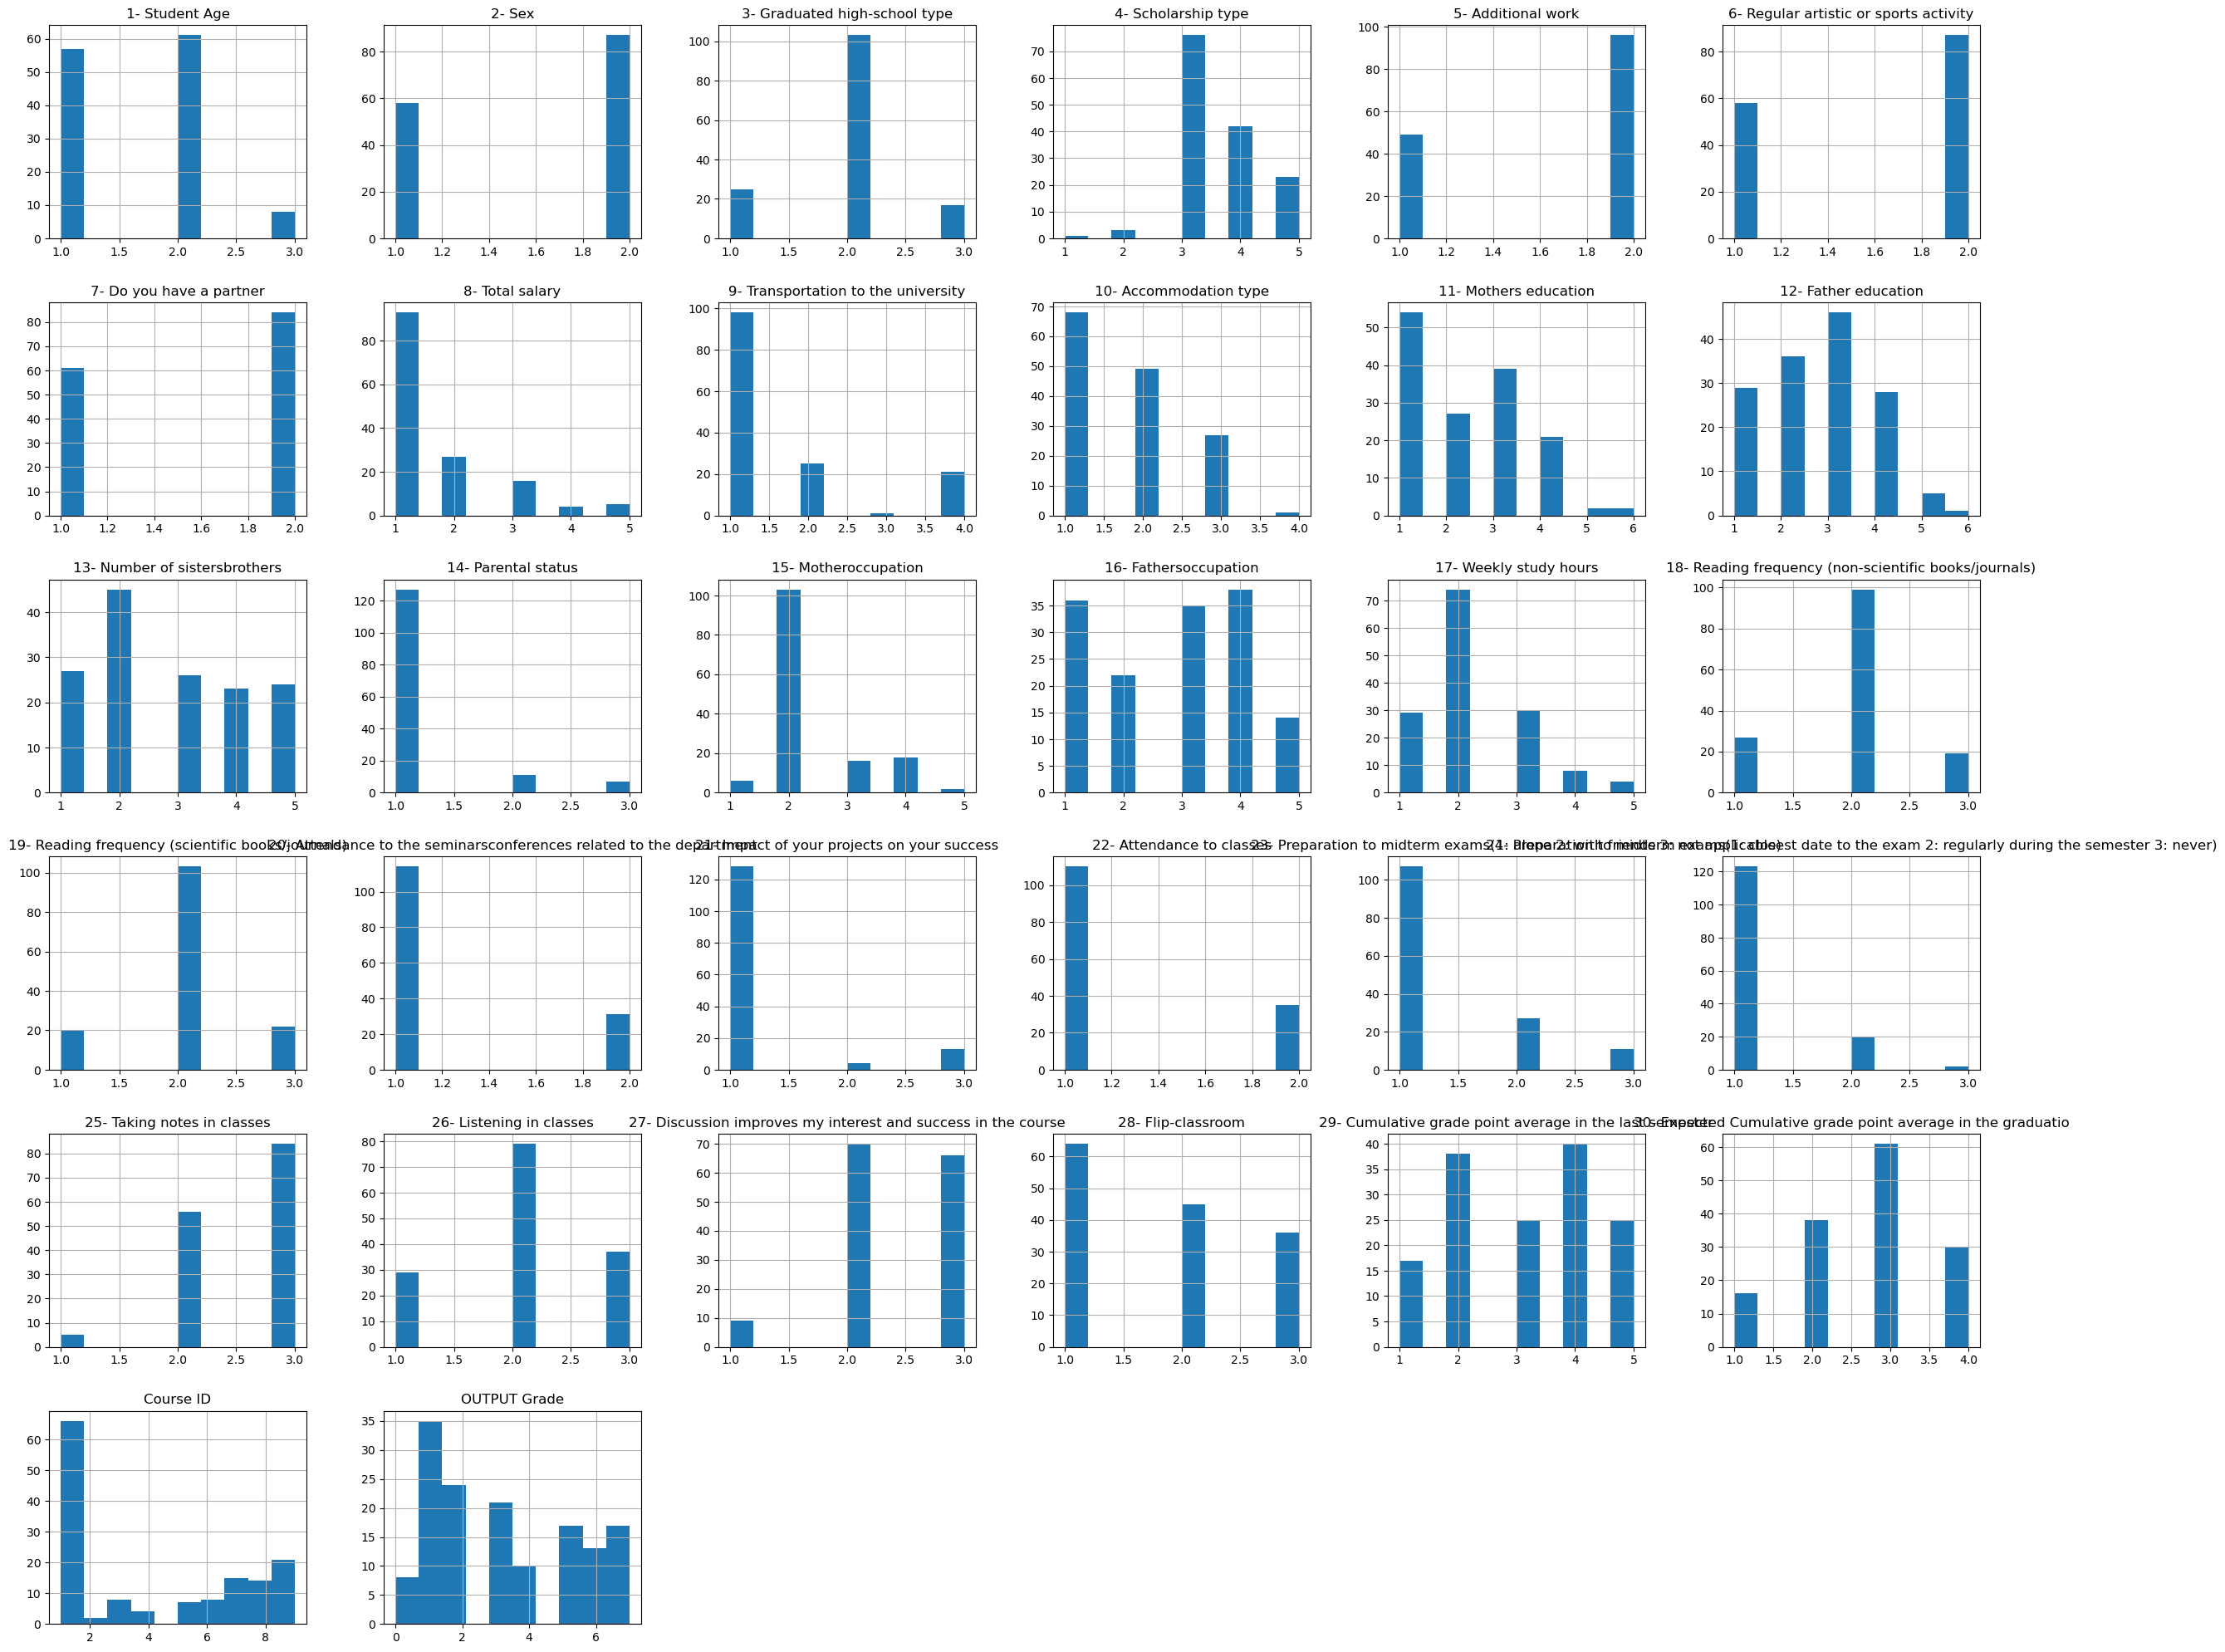

In [6]:
# Plot a basic histogram to view how data is distributed in each feacture and the target
student_data.hist(bins=10, figsize=(30, 25))
plt.show()

In [7]:
# Shorten the column names that are too long 
long_name_cols = [20, 23, 24, 29, 30]
student_data = student_data.rename(columns={
    student_data.iloc[:, long_name_cols].columns[0]: '20- Attendance to the seminars/conference',
    student_data.iloc[:, long_name_cols].columns[1]: '23- ExamPrep-AloneFriendsNA',
    student_data.iloc[:, long_name_cols].columns[2]: '24- ExamPrep-ClosetRegularNever', 
    student_data.iloc[:, long_name_cols].columns[3]: '29- CumGradePointAvg in last sem',
    student_data.iloc[:, long_name_cols].columns[4]: '30- Exp CumGradePointAvg in the graduation'})

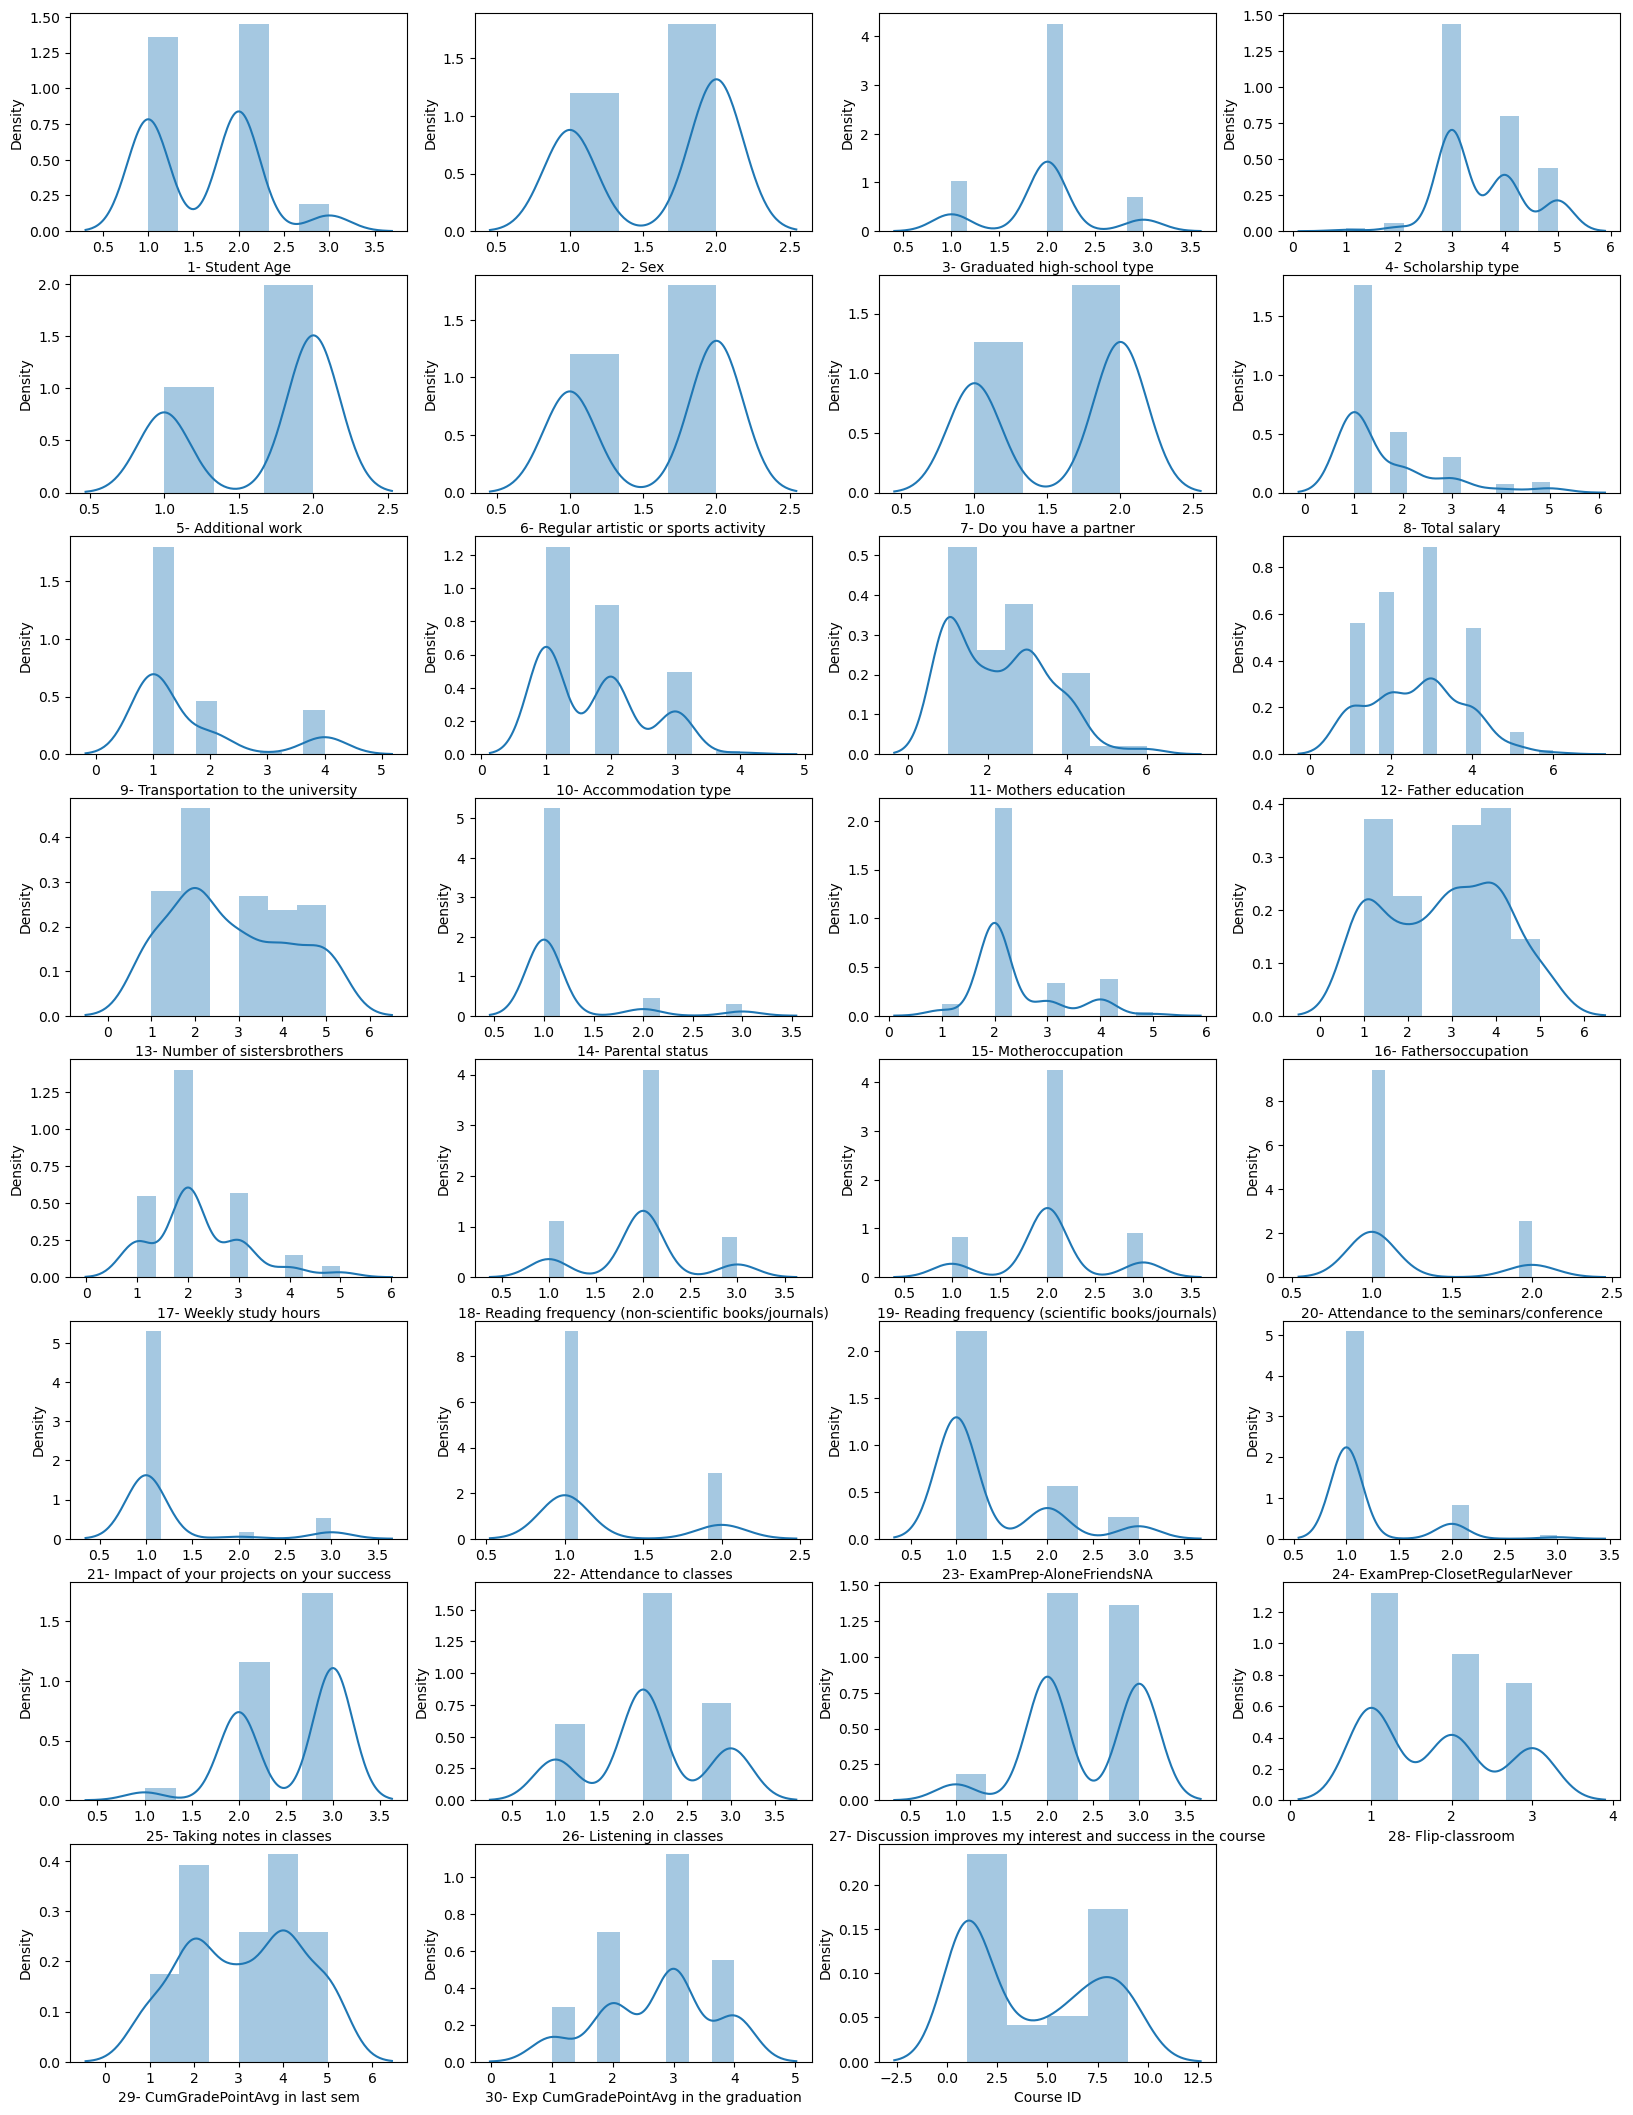

In [8]:
# Distribution plots for features
num_rows = (30+5-1)//5
plt.figure(figsize=(20, num_rows*5))
j = 1
for i in student_data.iloc[:,1:32].columns:
    plt.subplot(9, 4, j)
    sns.distplot(student_data[i])
    j+=1

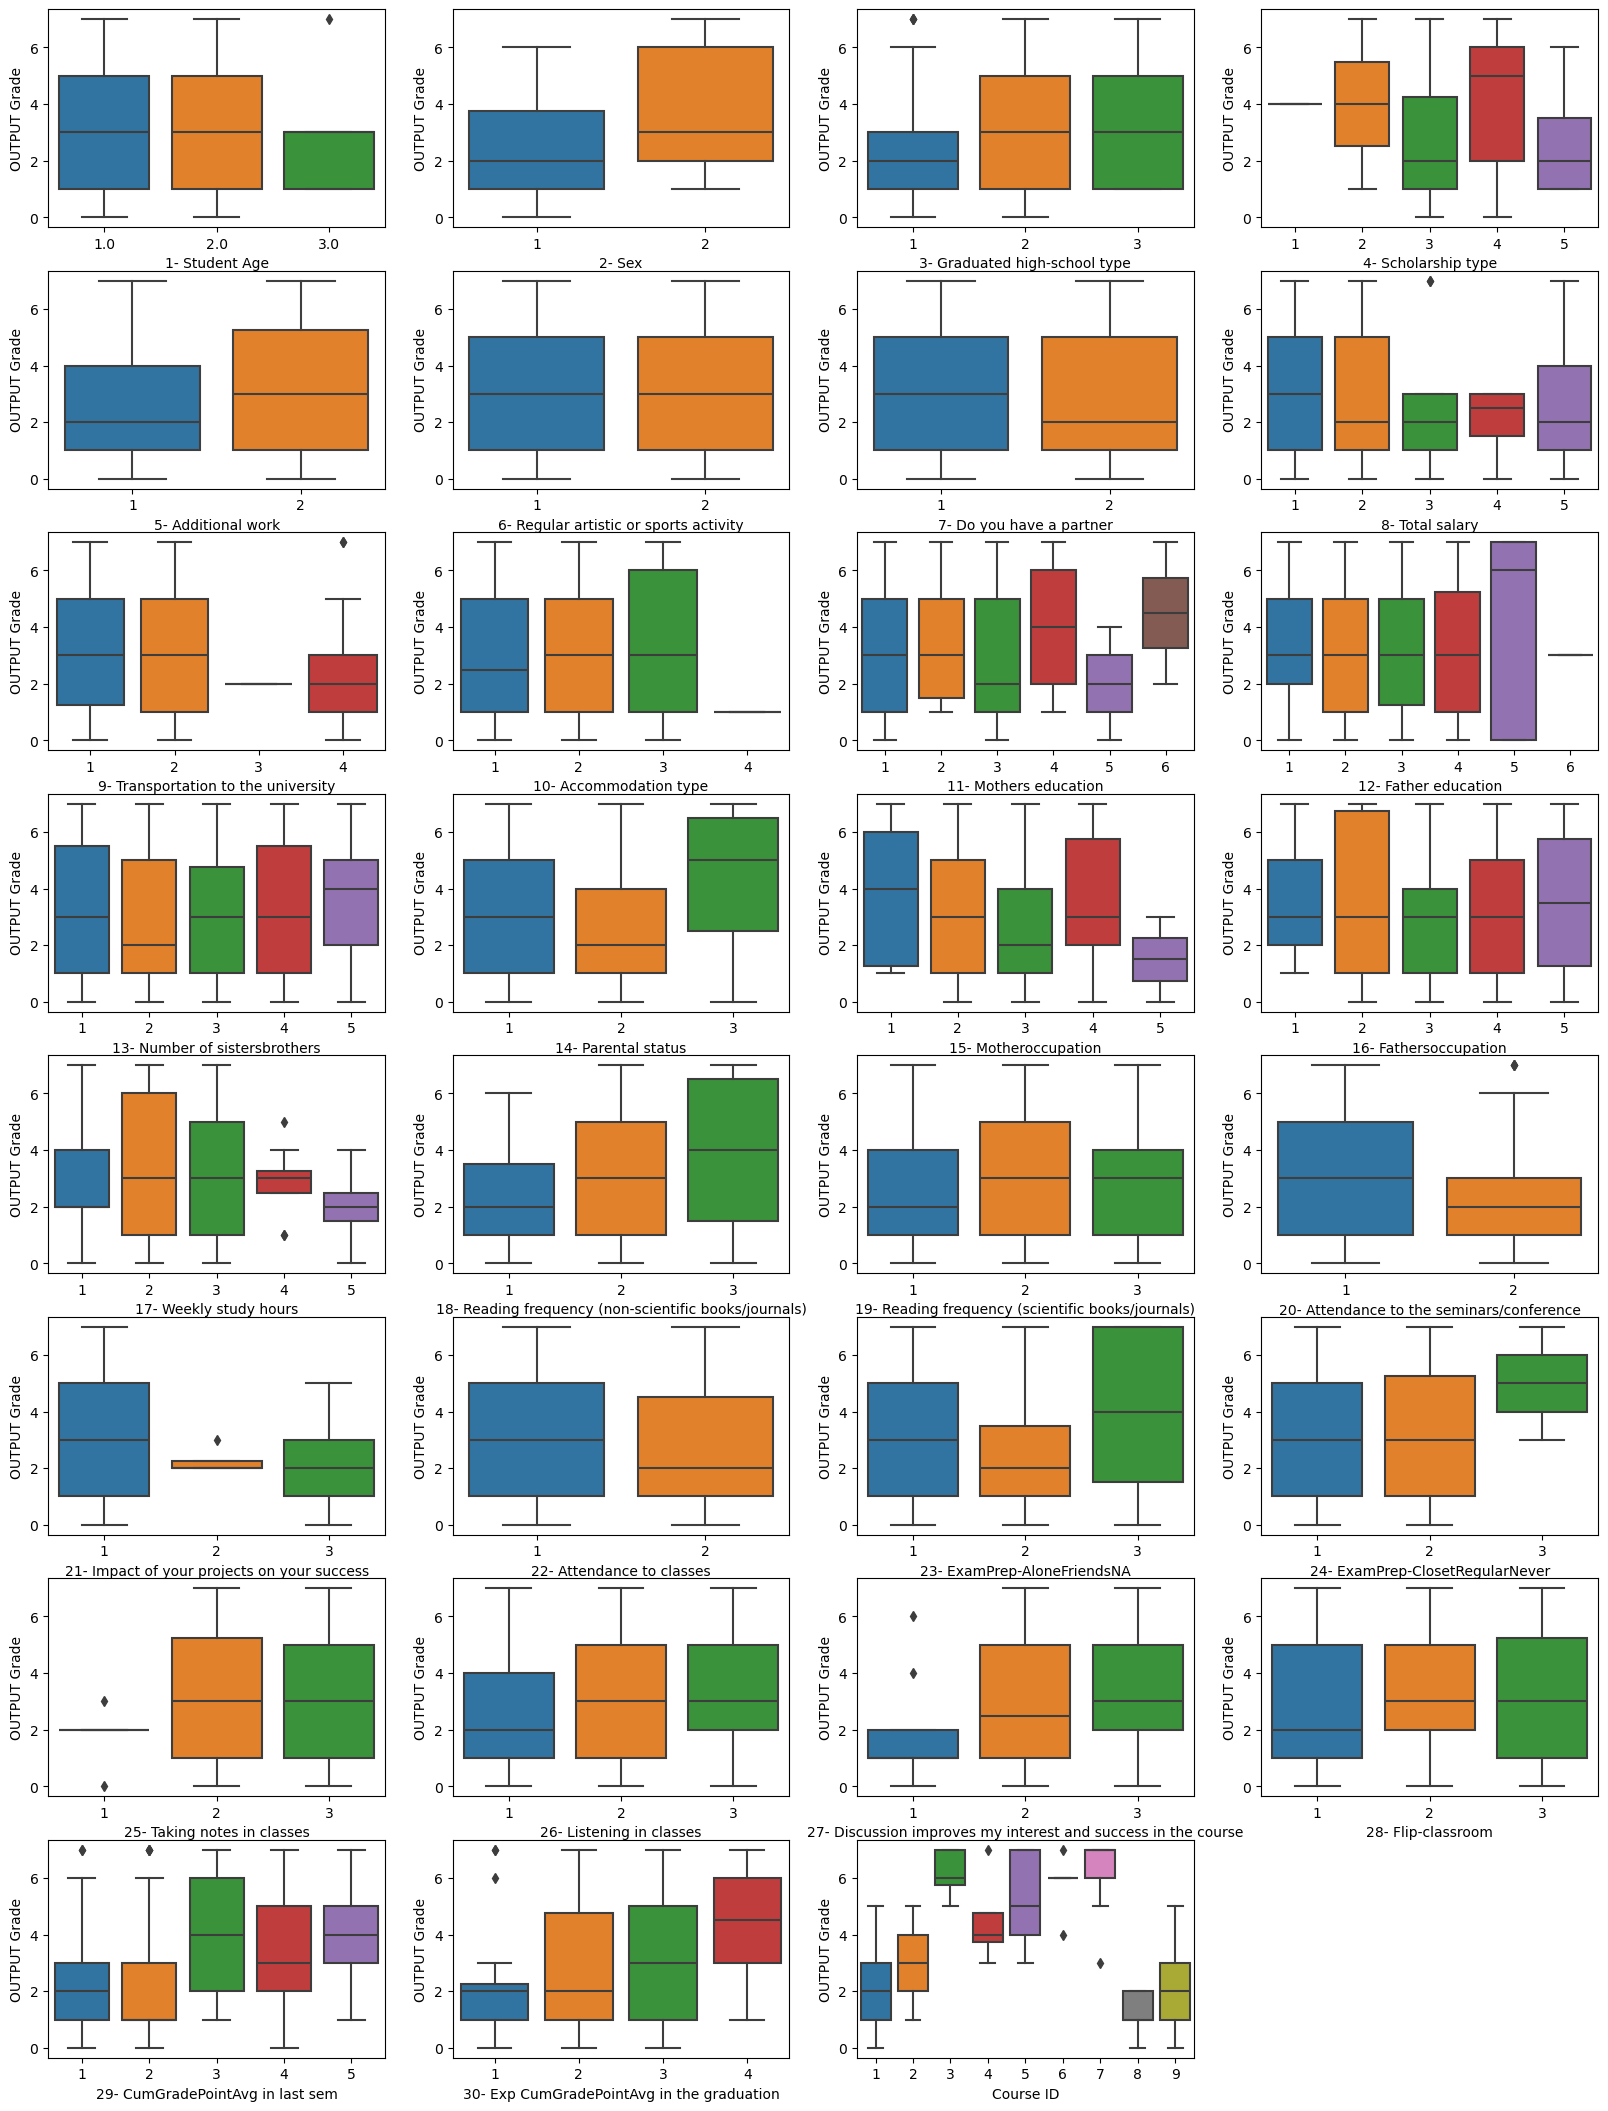

In [9]:
# Boxplot to find outliers
num_rows = (30+5-1)//5
plt.figure(figsize=(20, num_rows*5))
j = 1
for i in student_data.iloc[:,1:32].columns:
    plt.subplot(9, 4, j)
    sns.boxplot(x=student_data[i], y="OUTPUT Grade", data=student_data)
    j+=1

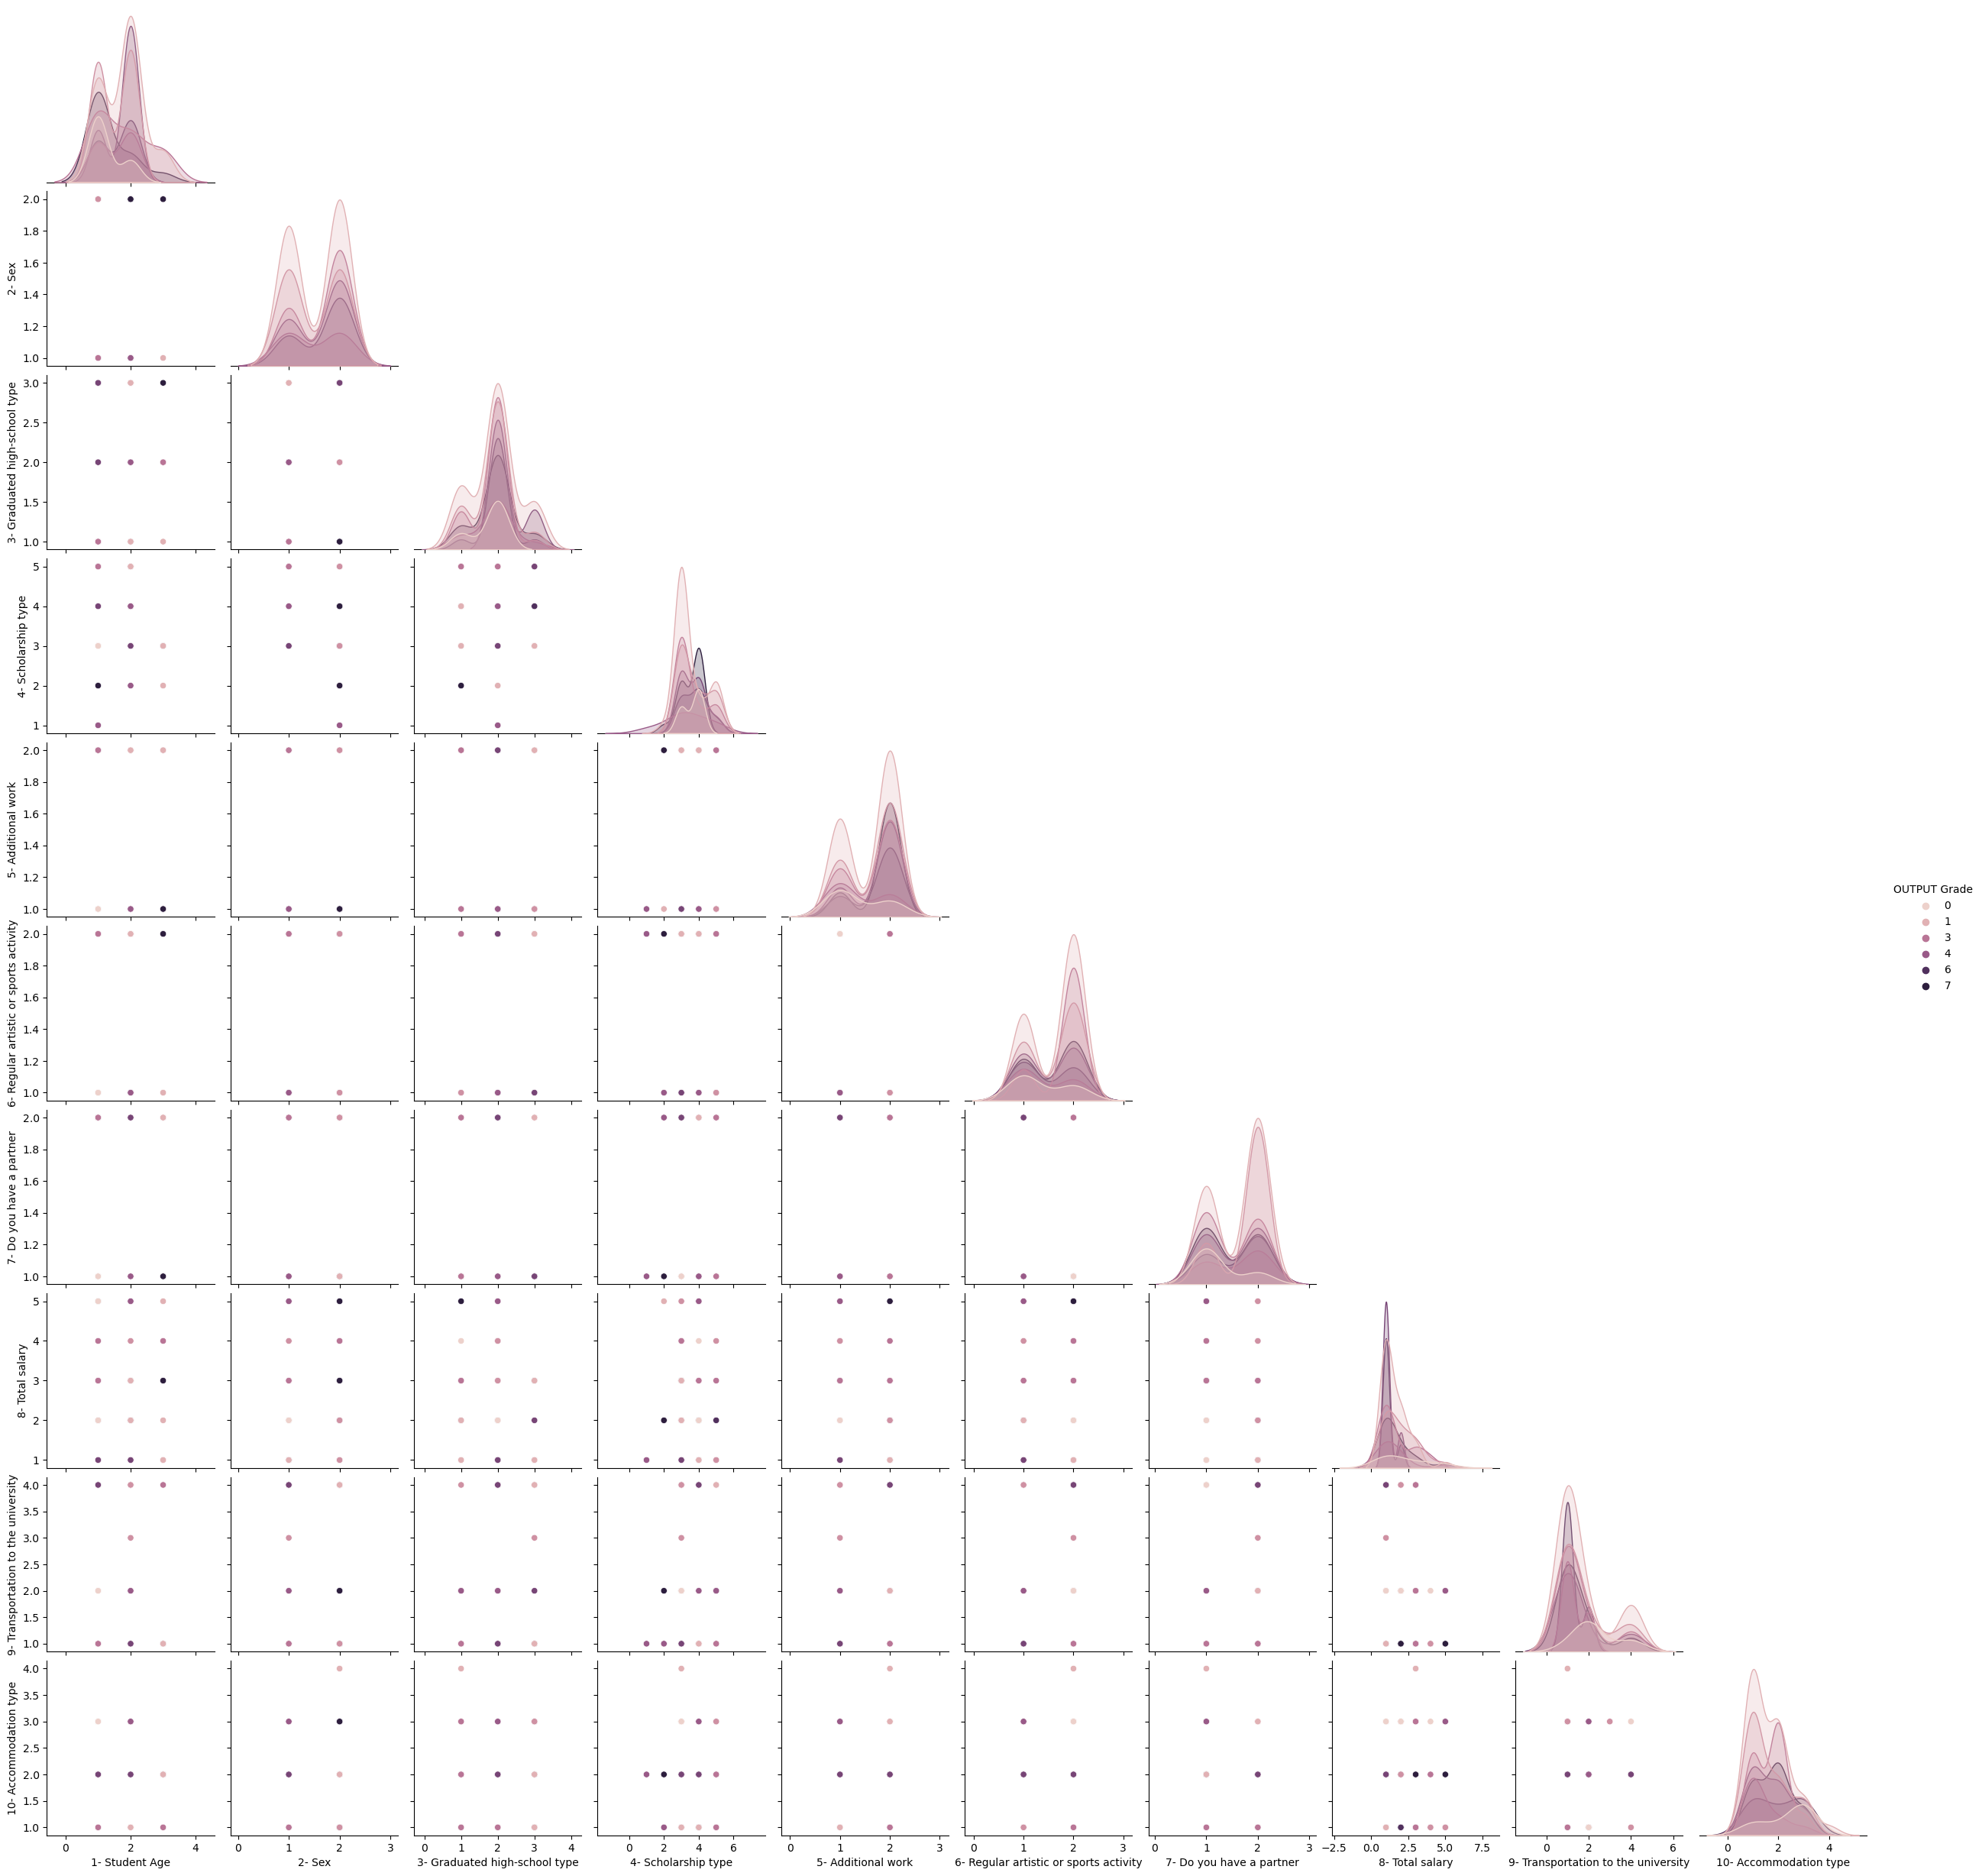

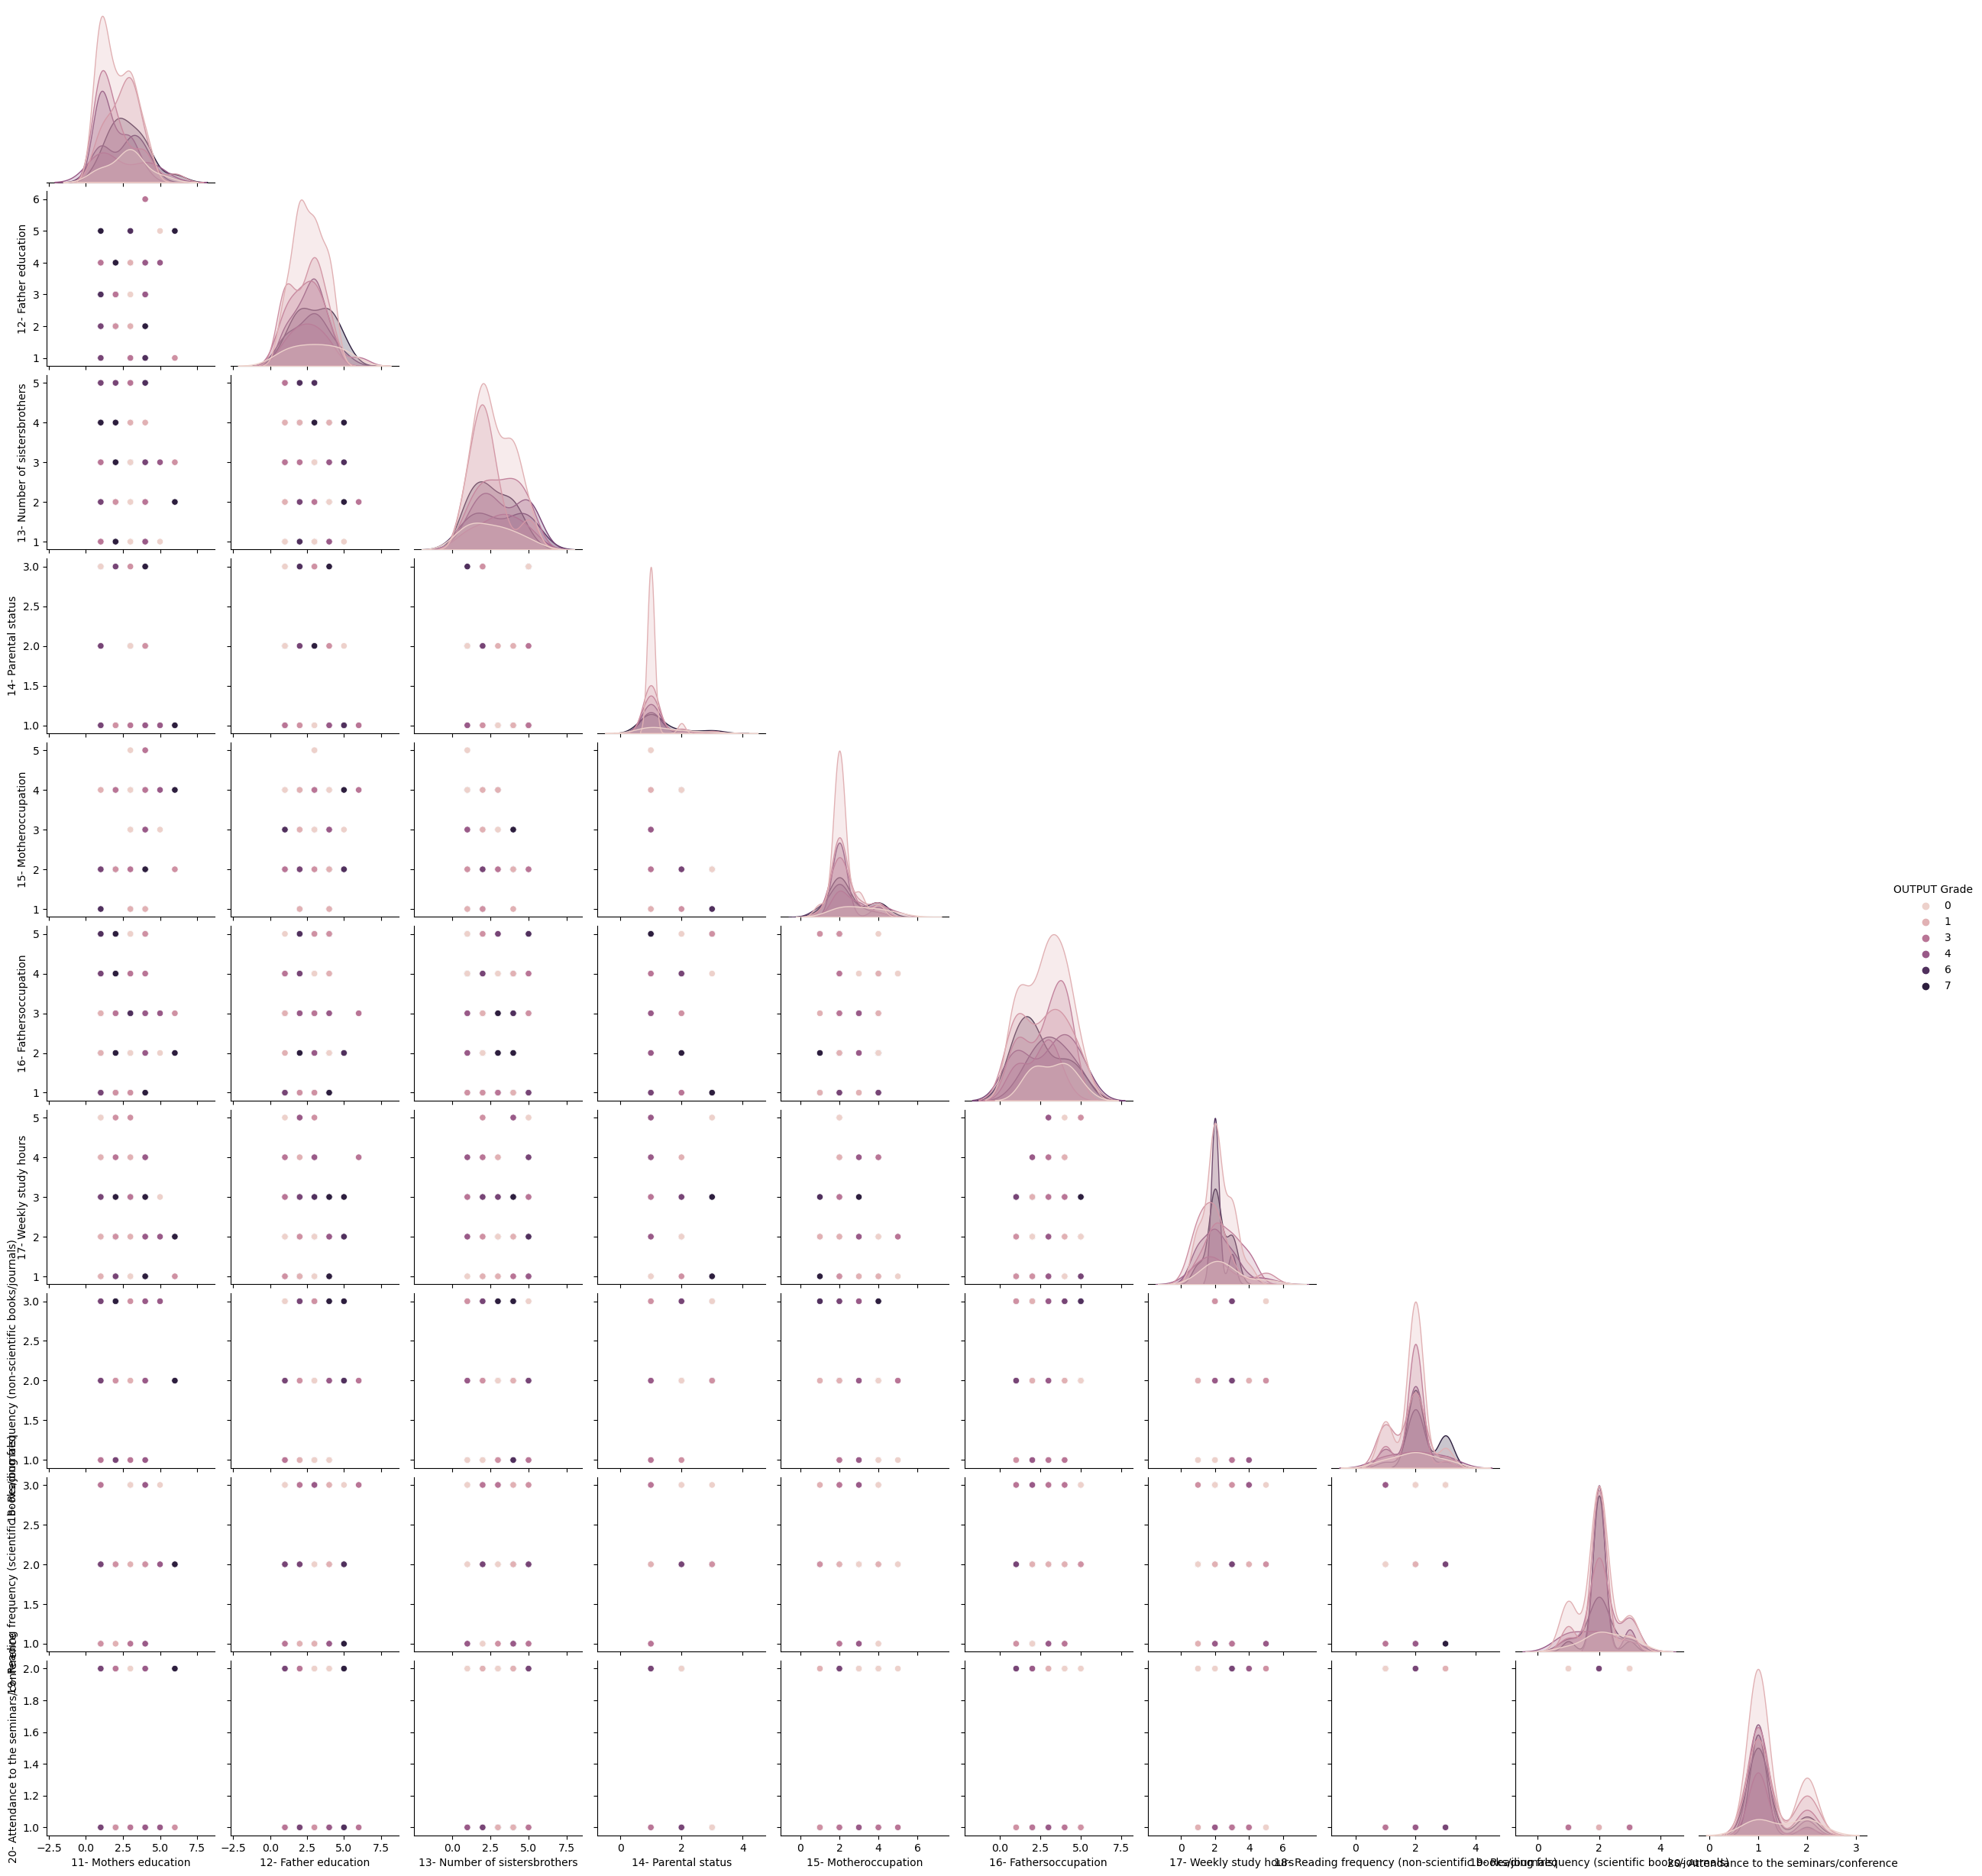

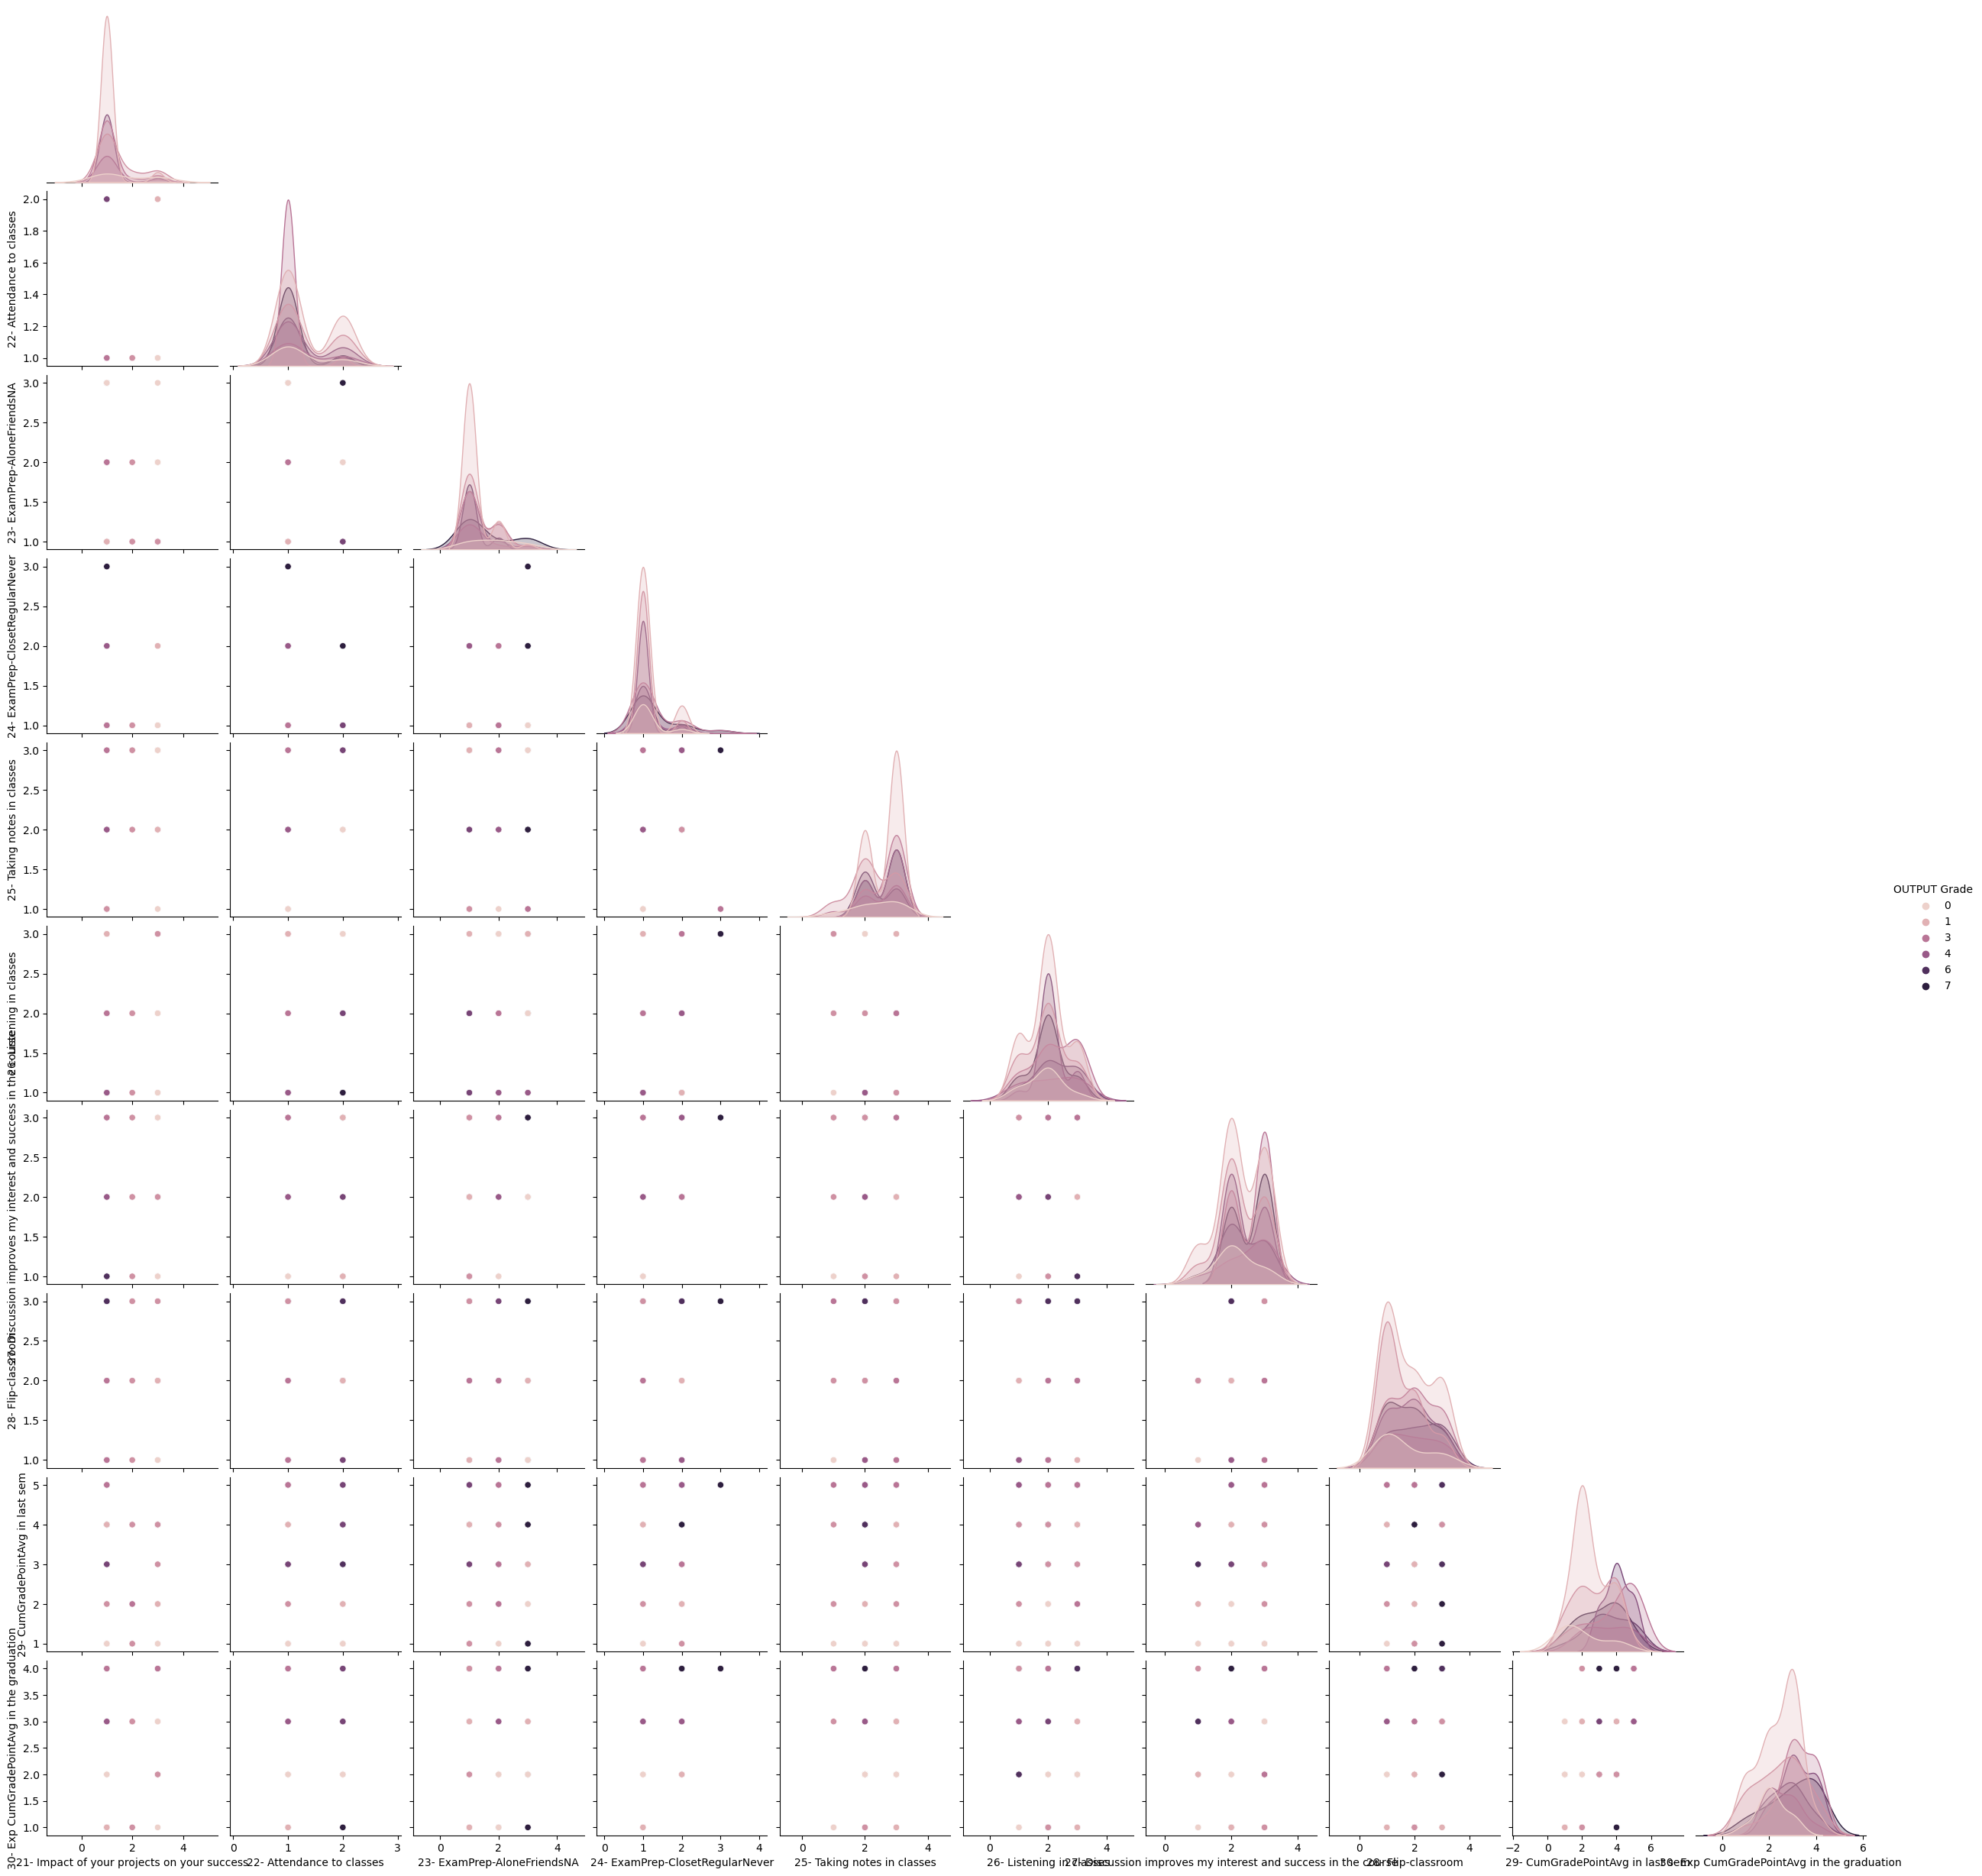

In [10]:
sns.pairplot(student_data.iloc[:, [0] + list(range(1, 11)) + [-1]], hue="OUTPUT Grade", corner=True)
plt.show()

sns.pairplot(student_data.iloc[:, [0] + list(range(11, 21)) + [-1]], hue="OUTPUT Grade", corner=True)
plt.show()

sns.pairplot(student_data.iloc[:, [0] + list(range(21, 31)) + [-1]], hue="OUTPUT Grade", corner=True)
plt.show()

### The outcome <a name="Theoutcome"></a>

Outcome of this data exploration stage is identifying data paterns and selecting which features might be relavant to each stakeholder (Feature Scalling) and what model feels best to use for each features set.

In addition to selecting stakeholders, density plot and a boxplot to is used to identify the distribution of the data points and the outliers.

After exploring the data, it is noticeable that it's quite difficult to identify a pattern in the distribution of most features. However, the boxplots indicate that there are a few outliers in some features. Features such as '4-Scholarship type,' '5-Additional work,' '6-Regular artistic or sports activity,' '25-Taking notes in class,' etc., have a small interquartile range and limited variability. The outliers in these features tend to exhibit more outliers than the other features with a larger IQR.

## Data Preprocessing <a name="DataPreprocessing"></a>
As the first step in data preprocessing I have handled the missing values. 'Student Age' is the only feature with null/missing values. It has age missing in 19 rows. Since, 19 out of 144 data is around 13% of the total dataset it is not a good idea to drop a significant amount of rows. As a result I've decided to handle missing values by <b>Imputing the missing values with the mode<b/>. 
    
Why the <b>mode instead of mean or median</b>?
    Mean and median are basically measures of central tendancy commonly used for imputing the missing values in numerical data. 
    However, using mean or median on categorical data doesn't make sense and may introduce values that do not exist in the original categorical variable. Mode is more suitable in my opinion for an instance like this as it'll use the value that is most frequent to fill the null values.
    
All the values are in numerical form and therefore no need to convert categorical values to numerical values. Dropped the 'Student ID' column as it doesn't seem to provide any valuable insight to the dataset.


### The goal <a name="Thegoal"></a>
The goal of data preprocessing is to handle missing data, scale/normalize the features, and prepare the data for training and testing in the selected model.

### The code <a name="Thecode"></a>

In [11]:
student_data.isnull() # identify the features with null values

Student ID  1- Student Age  2- Sex  3- Graduated high-school type  \
0         False           False   False                          False   
1         False           False   False                          False   
2         False           False   False                          False   
3         False           False   False                          False   
4         False            True   False                          False   
..          ...             ...     ...                            ...   
140       False           False   False                          False   
141       False           False   False                          False   
142       False            True   False                          False   
143       False           False   False                          False   
144       False           False   False                          False   

     4- Scholarship type  5- Additional work  \
0                  False               False   
1                  False               False   
2                  False               False   
3                  False               False   
4                  False               False   
..                   ...                 ...   
140                False               False   
141                False               False   
142                False               False   
143                False               False   
144                False               False   

     6- Regular artistic or sports activity  7- Do you have a partner  \
0                                     False                     False   
1                                     False                     False   
2                                     False                     False   
3                                     False                     False   
4                                     False                     False   
..                                      ...                       ...   
140                                   False                     False   
141                                   False                     False   
142                                   False                     False   
143                                   False                     False   
144                                   False                     False   

     8- Total salary  9- Transportation to the university  ...  \
0              False                                False  ...   
1              False                                False  ...   
2              False                                False  ...   
3              False                                False  ...   
4              False                                False  ...   
..               ...                                  ...  ...   
140            False                                False  ...   
141            False                                False  ...   
142            False                                False  ...   
143            False                                False  ...   
144            False                                False  ...   

     23- ExamPrep-AloneFriendsNA  24- ExamPrep-ClosetRegularNever  \
0                          False                            False   
1                          False                            False   
2                          False                            False   
3                          False                            False   
4                          False                            False   
..                           ...                              ...   
140                        False                            False   
141                        False                            False   
142                        False                            False   
143                        False                            False   
144                        False                            False   

     25- Taking notes in classes  26- Li

In [12]:
student_data.isnull().sum() # get the sum of null vaues 

# Student Age is the only feature with null values

Student ID                                                        0
1- Student Age                                                   19
2- Sex                                                            0
3- Graduated high-school type                                     0
4- Scholarship type                                               0
5- Additional work                                                0
6- Regular artistic or sports activity                            0
7- Do you have a partner                                          0
8- Total salary                                                   0
9- Transportation to the university                               0
10- Accommodation type                                            0
11- Mothers education                                             0
12- Father education                                              0
13- Number of sistersbrothers                                     0
14- Parental status                             

<Axes: >

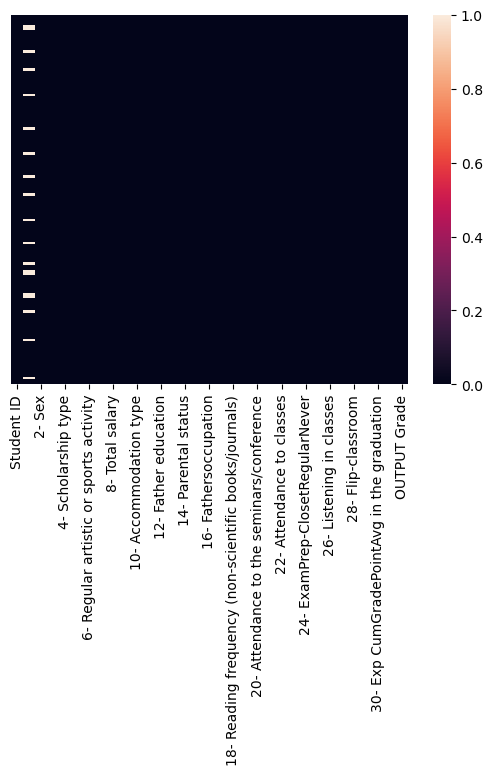

In [13]:
sns.heatmap(student_data.isnull(), yticklabels=False) # heat map to display null values

<Axes: xlabel='1- Student Age', ylabel='count'>

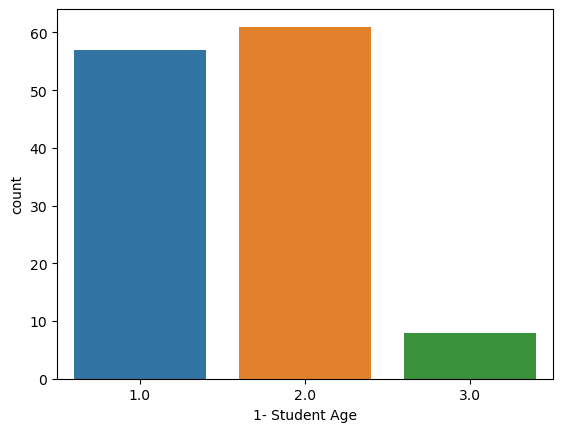

In [14]:
# count plot to display the student age
sns.countplot(x="1- Student Age", data=student_data) 

In [15]:
# Check the percentage of missing values (to decide whether to drop or impute)
student_age_missing_percentage = student_data.isnull()['1- Student Age'].sum()/student_data.shape[0]
print(f'Missing percentage of Student age: {student_age_missing_percentage:.2f}%')

Missing percentage of Student age: 0.13%


In [16]:
# Impute missing values with mode Because 13% is a large percentage to drop

# create a copy without making changes to the original dataframe
student_data_imputed = copy.deepcopy(student_data) 
student_data_imputed['1- Student Age'].fillna(student_data_imputed['1- Student Age'].mode().iloc[0], inplace=True) 
student_data_imputed.head()

Student ID  1- Student Age  2- Sex  3- Graduated high-school type  \
0   STUDENT1             2.0       2                              3   
1   STUDENT2             2.0       2                              3   
2   STUDENT3             2.0       2                              2   
3   STUDENT4             1.0       1                              1   
4   STUDENT5             2.0       2                              1   

   4- Scholarship type  5- Additional work  \
0                    3                   1   
1                    3                   1   
2                    3                   2   
3                    3                   1   
4                    3                   2   

   6- Regular artistic or sports activity  7- Do you have a partner  \
0                                       2                         2   
1                                       2                         2   
2                                       2                         2   
3                                       2                         1   
4                                       2                         1   

   8- Total salary  9- Transportation to the university  ...  \
0                1                                    1  ...   
1                1                                    1  ...   
2                2                                    4  ...   
3                2                                    1  ...   
4                3                                    1  ...   

   23- ExamPrep-AloneFriendsNA  24- ExamPrep-ClosetRegularNever  \
0                            1                                1   
1                            1                                1   
2                            1                                1   
3                            1                                2   
4                            2                                1   

   25- Taking notes in classes  26- Listening in classes  \
0                            3                         2   
1                            3                         2   
2                            2                         2   
3                            3                         2   
4                            2                         2   

   27- Discussion improves my interest and success in the course  \
0                                                  1               
1                                                  3               
2                                                  1               
3                                                  2               
4                                                  2               

   28- Flip-classroom  29- CumGradePointAvg in last sem  \
0                   2                                 1   
1                   2                                 2   
2                   1                                 2   
3                   1                                 3   
4                   1                                 2   

   30- Exp CumGradePointAvg in the graduation  Course ID  OUTPUT Grade  
0                                           1          1             1  
1                                           3          1             1  
2                                           2          1             1  
3                                           2          1             1  
4                                           2          1             1  

[5 rows x 33 columns]

In [17]:
student_data_imputed.isnull().sum() # Check for any missed null values

Student ID                                                       0
1- Student Age                                                   0
2- Sex                                                           0
3- Graduated high-school type                                    0
4- Scholarship type                                              0
5- Additional work                                               0
6- Regular artistic or sports activity                           0
7- Do you have a partner                                         0
8- Total salary                                                  0
9- Transportation to the university                              0
10- Accommodation type                                           0
11- Mothers education                                            0
12- Father education                                             0
13- Number of sistersbrothers                                    0
14- Parental status                                           

In [18]:
# Dropping 'Student ID' as it seems irrelavant to the stakeholders and generally to the dataset
student_data_imputed.drop("Student ID", axis=1, inplace=True) 
student_data_imputed.columns # recheck column names

Index(['1- Student Age', '2- Sex', '3- Graduated high-school type',
       '4- Scholarship type', '5- Additional work',
       '6- Regular artistic or sports activity', '7- Do you have a partner',
       '8- Total salary', '9- Transportation to the university',
       '10- Accommodation type', '11- Mothers education',
       '12- Father education', '13- Number of sistersbrothers',
       '14- Parental status', '15- Motheroccupation', '16- Fathersoccupation',
       '17- Weekly study hours',
       '18- Reading frequency (non-scientific books/journals)',
       '19- Reading frequency (scientific books/journals)',
       '20- Attendance to the seminars/conference',
       '21- Impact of your projects on your success',
       '22- Attendance to classes', '23- ExamPrep-AloneFriendsNA',
       '24- ExamPrep-ClosetRegularNever', '25- Taking notes in classes',
       '26- Listening in classes',
       '27- Discussion improves my interest and success in the course',
       '28- Flip-classroom'

### The outcome <a name="Theoutcome"></a>
- Identify features with null values and imputing them with mode
- Drop irrelavant features (Student ID)

## Feature Engineering and Feature Selection <a name="FEFS"></a>
Feature engineering refers to a process of selecting and transforming features in your dataset when creating a predictive model using machine learning (David, 2021). Feature engineering for categorical variables consists of label encoding or one-hot encoding. However, this document does not include any encoding as all the features are already indicated in integers. 

The purpose of feature selection is to reduce the input for the model by using only relavent data and getting rid of noise in data. Having irrelavant features can impact the accuracy of the model. Feature selection could either be done either manually or automatically.

### The goal <a name="Thegoal"></a>
Perform univariate selection and plot a correaltion heatmap to select features that have strong relationship with the target vairable (Outuput Grade).

### The code <a name="Thecode"></a>

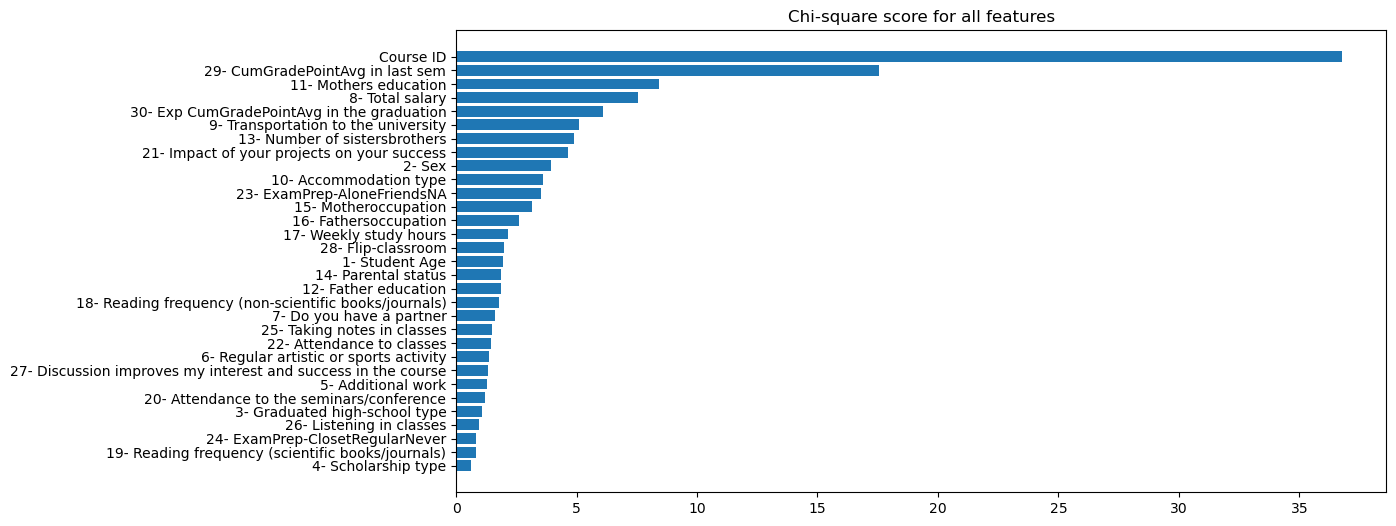

Selected features: Index(['2- Sex', '8- Total salary', '9- Transportation to the university',
       '10- Accommodation type', '11- Mothers education',
       '13- Number of sistersbrothers', '15- Motheroccupation',
       '16- Fathersoccupation', '17- Weekly study hours',
       '21- Impact of your projects on your success',
       '23- ExamPrep-AloneFriendsNA', '28- Flip-classroom',
       '29- CumGradePointAvg in last sem',
       '30- Exp CumGradePointAvg in the graduation', 'Course ID'],
      dtype='object')


In [19]:
# Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
import copy

# Create a new copy of the original dataframe
student_data_univariate = copy.deepcopy(student_data_imputed) 

# Seperate into axis
X_uni = student_data_univariate.drop('OUTPUT Grade', axis=1)
y_uni = student_data_univariate['OUTPUT Grade']

# Select top features and fit
chi2_features = SelectPercentile(score_func=chi2, percentile=50)
chi2_transform = chi2_features.fit_transform(X_uni, y_uni)

# Plot the feature relavance
plt.figure(figsize=(12,6))
univariate_result = pd.DataFrame(data={"score": chi2_features.scores_, "feature": X_uni.columns}).sort_values(by="score")
plt.barh(univariate_result["feature"], univariate_result["score"])
plt.title("Chi-square score for all features")
plt.show()

# Print first 50% of the features
selected_features = X_uni.columns[chi2_features.get_support()]
print(f"Selected features: {selected_features}")

<Axes: >

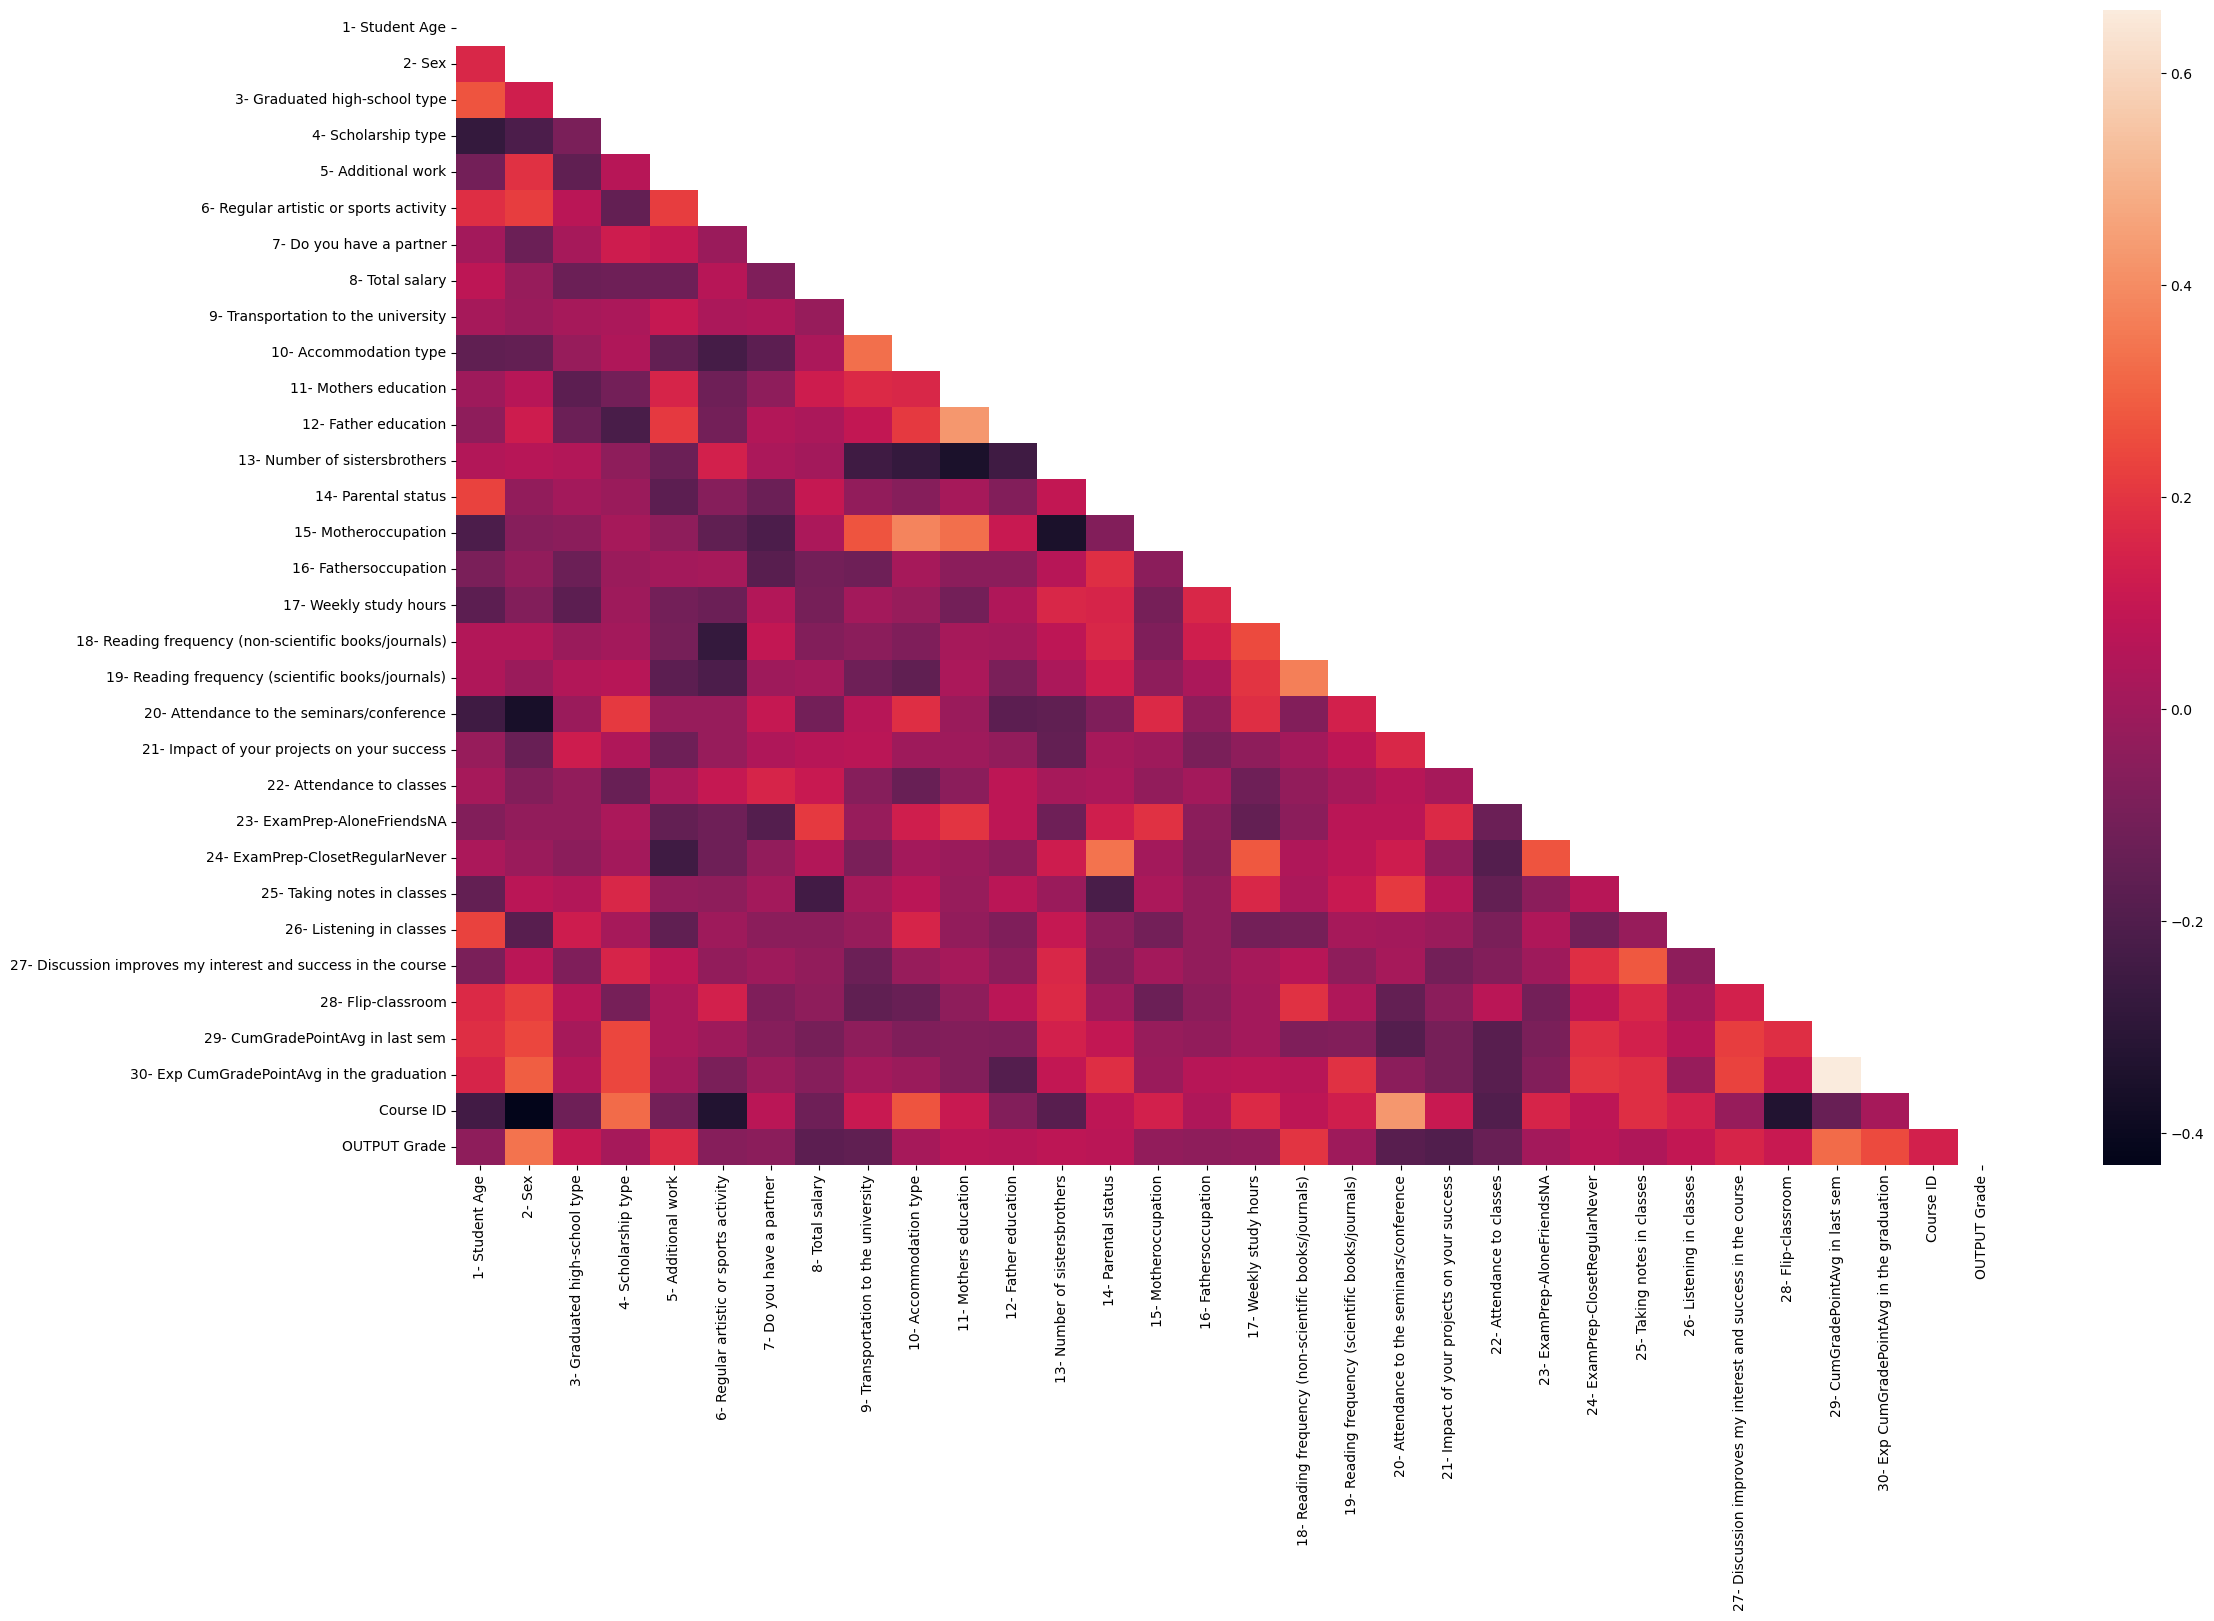

In [20]:
# Correlation heatmap
student_data_feature_heatmap = copy.deepcopy(student_data_imputed) # create a copy

# Plot the heatmap
plt.figure(figsize=(25,15))
sd_corr_heatmap =  pd.DataFrame(student_data_feature_heatmap, columns=student_data_feature_heatmap.columns) 
mask = np.triu(np.ones_like(sd_corr_heatmap.corr(), dtype=np.bool))
sns.heatmap(sd_corr_heatmap.corr().round(2), mask=mask, annot=True, yticklabels=True, xticklabels=True) 

In [21]:
# Feature selection
correlations = student_data_imputed.corr()['OUTPUT Grade'] # get all the correlations of features with output grade

positive_correlations = correlations[correlations > 0] # positive relations
negative_correlations = correlations[correlations < 0] # negative correlations

# Get the top 50% positive features
num_positive_features = int(len(positive_correlations) * 50 / 100)
selected_positive_features = positive_correlations.nlargest(num_positive_features).index.tolist()

# Get the top 50% negative features
num_negative_features = int(len(negative_correlations) *  50 / 100)
selected_negative_features = negative_correlations.nsmallest(num_negative_features).index.tolist()

# Combine selected positive and negative features
selected_features = selected_positive_features + selected_negative_features
selected_features.remove('OUTPUT Grade') # remove target variable from the selected features

print(selected_features)

['2- Sex', '29- CumGradePointAvg in last sem', '30- Exp CumGradePointAvg in the graduation', '18- Reading frequency (non-scientific books/journals)', '5- Additional work', '27- Discussion improves my interest and success in the course', 'Course ID', '28- Flip-classroom', '3- Graduated high-school type', '21- Impact of your projects on your success', '20- Attendance to the seminars/conference', '8- Total salary', '9- Transportation to the university', '22- Attendance to classes']


### The outcome <a name="Theoutcome"></a>
From the above correlation matrix, it is clear that most of the features do not have a strong positive relation with the target variable. And Chi-square score graph shows that only two feature have strong relation with the target variable. 

Therefore, after carefull consideration, the top 50% of features with highest poistive correlation and highest negative correlation was selected as the features to perfom model training. The selected features are as follows:

- 2- Sex
- 3- Graduated high-school type
- 5- Additional work
- 8- Total salary
- 9- Transportation to the university
- 18- Reading frequency (non-scientific books/journals)
- 20- Attendance to the seminars/conference
- 21- Impact of your projects on your success
- 22- Attendance to classes
- 27- Discussion improves my interest and success in the course
- 28- Flip-classroom
- 29- CumGradePointAvg in the last sem
- 30- Exp CumGradePointAvg in the graduation
- Course ID

## Select, Train, Apply ML models <a name="SA"></a>
This stage is crucial for Machine learning model development. Here, our goal is to create a smart model that predicts outcomes using chosen features. We start by dividing the data into training and testing sets. Next, we apply our training data to various predictive models, optimising parameters for better performance, and measure accuracy. It's vital to test different models before choosing the best one for our specific needs. 

The machine learning models explored in this document include <b>Logistic Regression, Random Forest, Decision Tree, K-Nearest Neighbour, SVM, and RNN.</b>

### The goal <a name="Thegoal"></a>
Split the dataset and use the training set on different predictive models, Parameter optimising, Resample the data to reduce the bias in the target variable. Perform GridSearch to find hyperparameters in each model and plot ROC curves.

### The code <a name="Thecode"></a>

In [22]:
# Import Modules
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [23]:
# Train Test and Split data
X = student_data_imputed[selected_features]  # Features
y = student_data_imputed['OUTPUT Grade']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<Axes: xlabel='OUTPUT Grade', ylabel='count'>

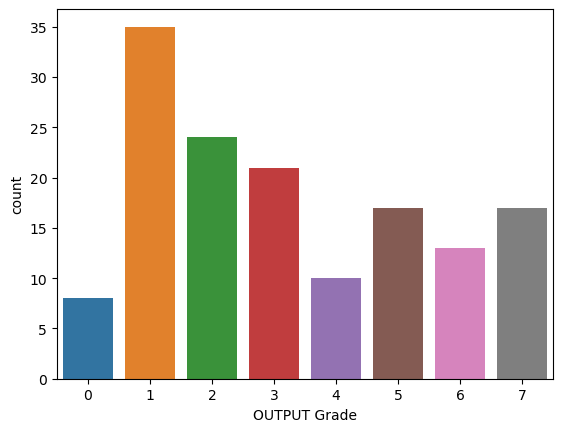

In [24]:
# Count plot to display the 'OUTPUT Grade'
# Below plot shows 'output grade category 1' having more data than the other grades
# which could decrease accuracy of the model
sns.countplot(x="OUTPUT Grade", data=student_data_imputed) 

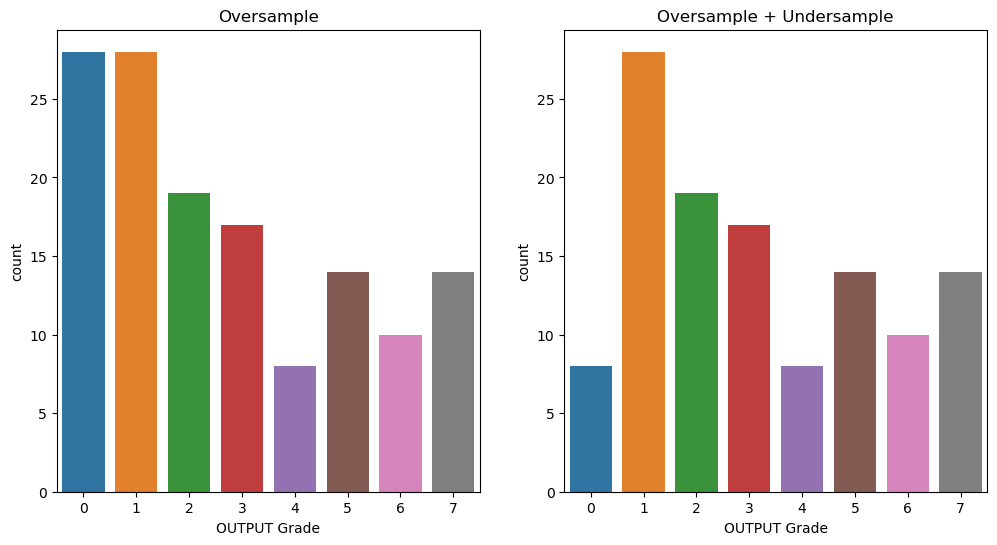

In [25]:
# Combined Resampling using SMOTE and RandomOverSampler (Brownlee, 2021)

# Oversampling
over = SMOTE(sampling_strategy="minority", random_state=42)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

# Undersampling
under = RandomUnderSampler(sampling_strategy="majority", random_state=42)
X_train_resampled, y_train_resampled = under.fit_resample(X_train_over, y_train_over)

# Plot both figures for oversampling and undersampling
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.countplot(x=y_train_over, data=pd.DataFrame(y_train_over, columns=['OUTPUT Grade']))
plt.title("Oversample")

plt.subplot(1,2,2)
sns.countplot(x=y_train_resampled, data=pd.DataFrame(y_train_resampled, columns=['OUTPUT Grade'])) 
plt.title("Oversample + Undersample")

plt.show()

Hyperparameters {'m__C': 0.001, 'm__penalty': 'l2'}
Logistic Regression Accuracy: 24.14%


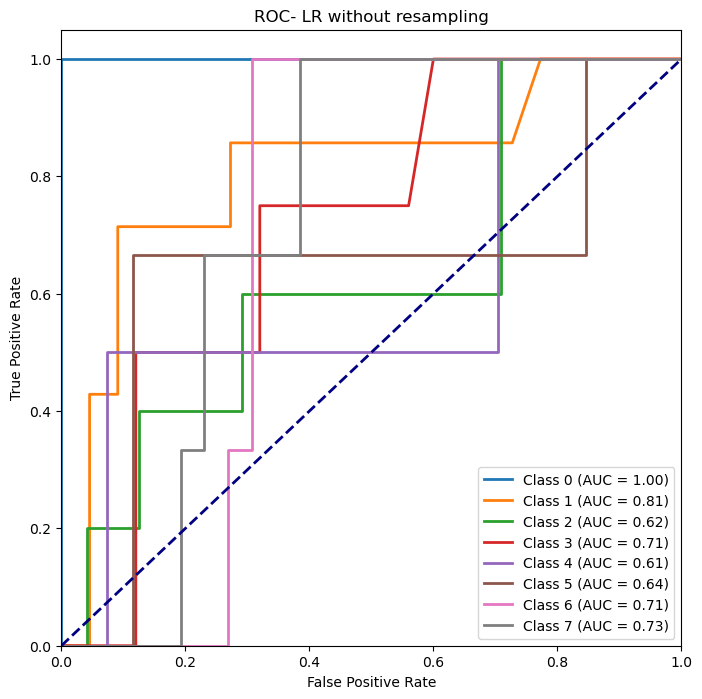

In [26]:
# Logistic Regression - Without resampling
logistic_reg = LogisticRegression()

# Parameter grid
param_grid = {
    'm__penalty': ['none', 'l1', 'l2'],
    'm__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create pipeline
pipeline = Pipeline([('m', logistic_reg)])

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Hyperparameters", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_logistic_reg_grid = best_model.predict(X_test)
y_probs_logistic_reg_grid = best_model.predict_proba(X_test)

# Calculate accuracy
logistic_reg_accuracy_grid = accuracy_score(y_test, y_pred_logistic_reg_grid)
print(f"Logistic Regression Accuracy: {logistic_reg_accuracy_grid * 100:.2f}%")

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=best_model.classes_)

# ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_logistic_reg_grid[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(best_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC- LR without resampling')
plt.legend(loc='lower right')
plt.show()


Hyperparameters {'m__C': 1, 'm__penalty': 'l2'}
Logistic Regression Accuracy: 37.93%


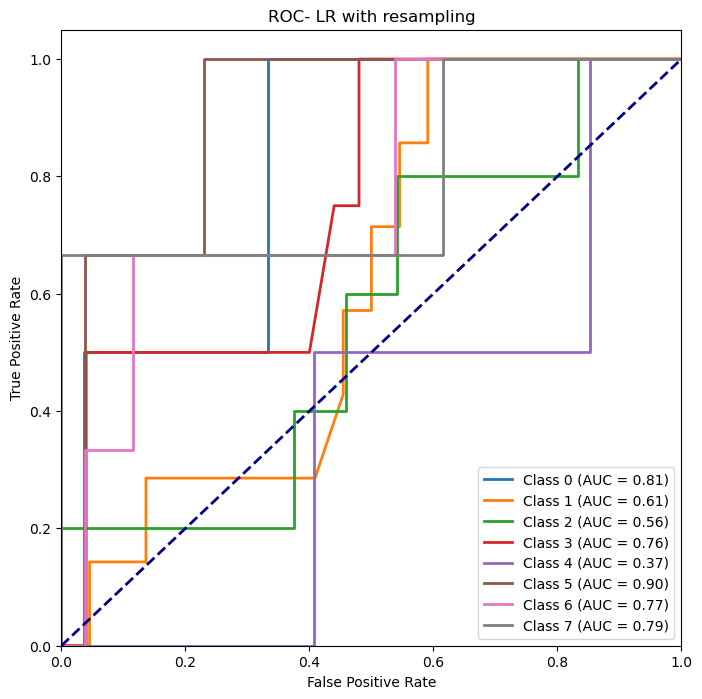

In [27]:
# Logistic Regression - With resampling
logistic_reg_rs = LogisticRegression()

# Parameter grid
param_grid = {
    'm__penalty': ['none', 'l1', 'l2'],
    'm__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create pipeline
pipeline = Pipeline([('m', logistic_reg_rs)])

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print("Hyperparameters", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_logistic_reg_grid_rs = best_model.predict(X_test)
y_probs_logistic_reg_grid = best_model.predict_proba(X_test)

# Calculate accuracy
logistic_reg_accuracy_grid = accuracy_score(y_test, y_pred_logistic_reg_grid_rs)
print(f"Logistic Regression Accuracy: {logistic_reg_accuracy_grid * 100:.2f}%")

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=best_model.classes_)

# ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_logistic_reg_grid[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(best_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC- LR with resampling')
plt.legend(loc='lower right')
plt.show()


Hyperparameters {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 50}
RFS Accuracy: 44.83%


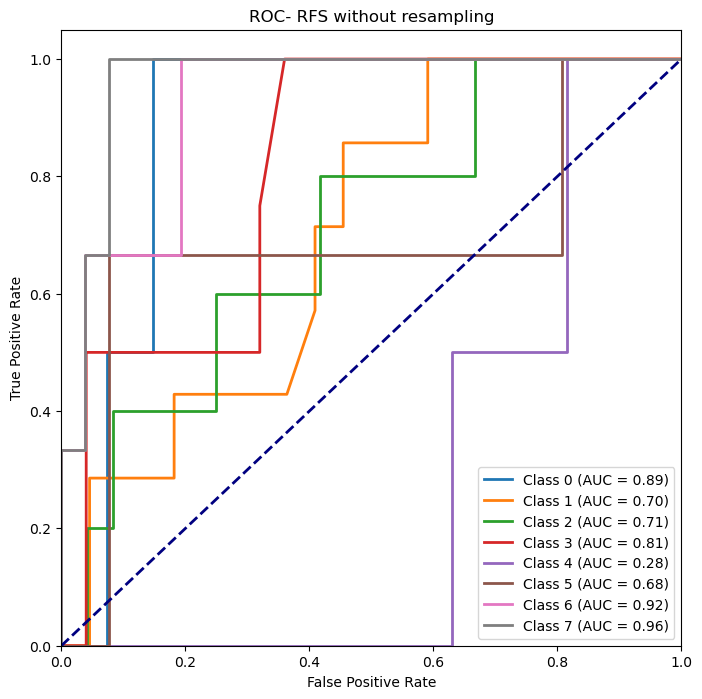

In [28]:
# Random Forest Search - Without resampling
rfc = RandomForestClassifier(random_state=42)

# Testing hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [7, 8, 9, 10, 12], 
    'min_samples_leaf': [0, 1, 2, 4] 
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Hyperparameters", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_rf = best_model.predict(X_test)
y_probs_rf = best_model.predict_proba(X_test)

# Calculate accuracy
rfc_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"RFS Accuracy: {rfc_accuracy * 100:.2f}%")

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=best_model.classes_)

# ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(best_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC- RFS without resampling')
plt.legend(loc='lower right')
plt.show()


Hyperparameters {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 100}
RFS Accuracy: 24.14%


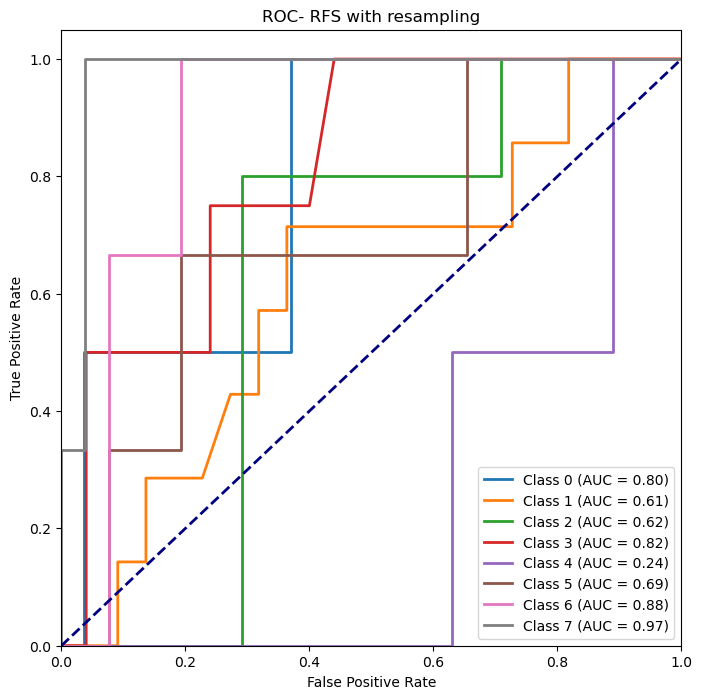

In [29]:
# Random Forest Search - With resampling
rfc_rs = RandomForestClassifier(random_state=42)

# Testing hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [5, 4, 6, 7, 8, 9, 10], 
    'min_samples_leaf': [0, 1, 2, 4] 
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rfc_rs, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print("Hyperparameters", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_rf_rs = best_model.predict(X_test)
y_probs_rf = best_model.predict_proba(X_test)

# Calculate accuracy
rfc_accuracy = accuracy_score(y_test, y_pred_rf_rs)
print(f"RFS Accuracy: {rfc_accuracy * 100:.2f}%")

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=best_model.classes_)

# ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(best_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC- RFS with resampling')
plt.legend(loc='lower right')
plt.show()


                                              Feature  Importance
6                                           Course ID    0.202441
1                    29- CumGradePointAvg in last sem    0.135350
2          30- Exp CumGradePointAvg in the graduation    0.081468
0                                              2- Sex    0.069537
7                                  28- Flip-classroom    0.068861
11                                    8- Total salary    0.062205
4                                  5- Additional work    0.060756
8                       3- Graduated high-school type    0.057783
3   18- Reading frequency (non-scientific books/jo...    0.054451
12                9- Transportation to the university    0.052416
13                          22- Attendance to classes    0.044181
5   27- Discussion improves my interest and succes...    0.041752
9         21- Impact of your projects on your success    0.036259
10          20- Attendance to the seminars/conference    0.032541


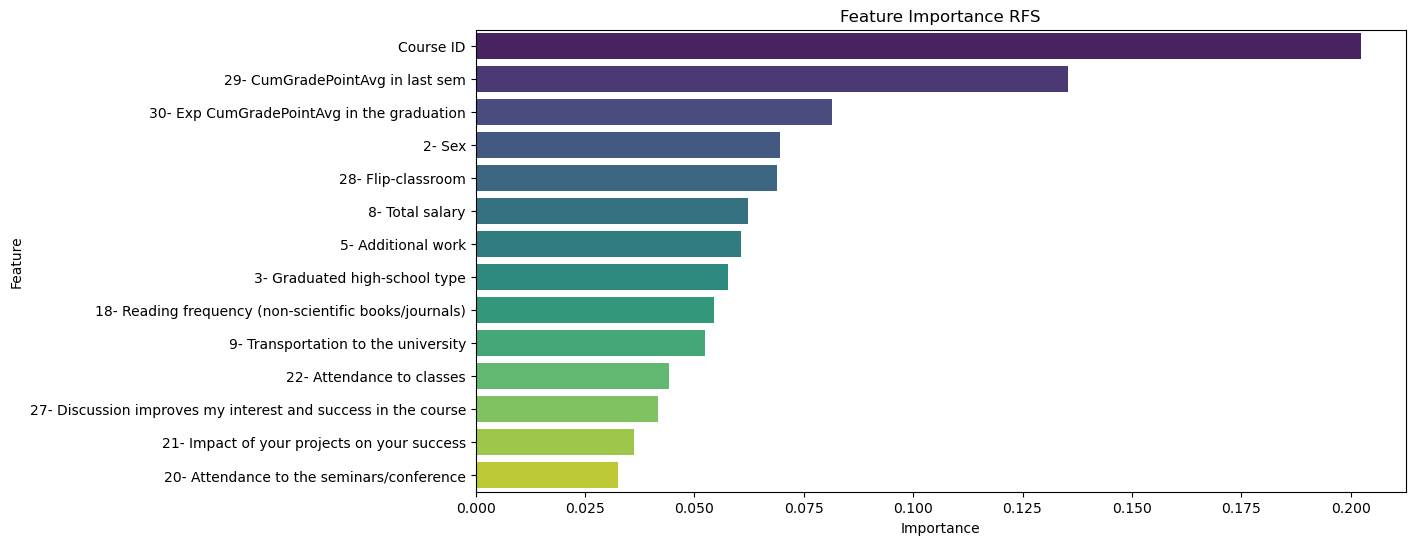

In [30]:
# See feature importance for Random Forest Search
# To see if there's any significance difference between feature selection models, and as you can see from the chart below
# there is no difference between the univariate selection and RFS feature selection
feature_importances = best_model.feature_importances_
importances_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importances_df = importances_df.sort_values(by="Importance", ascending=False)
print(importances_df)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Feature Importance RFS')
plt.show()

Hyperparameters {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
KNN accuracy: 31.03%


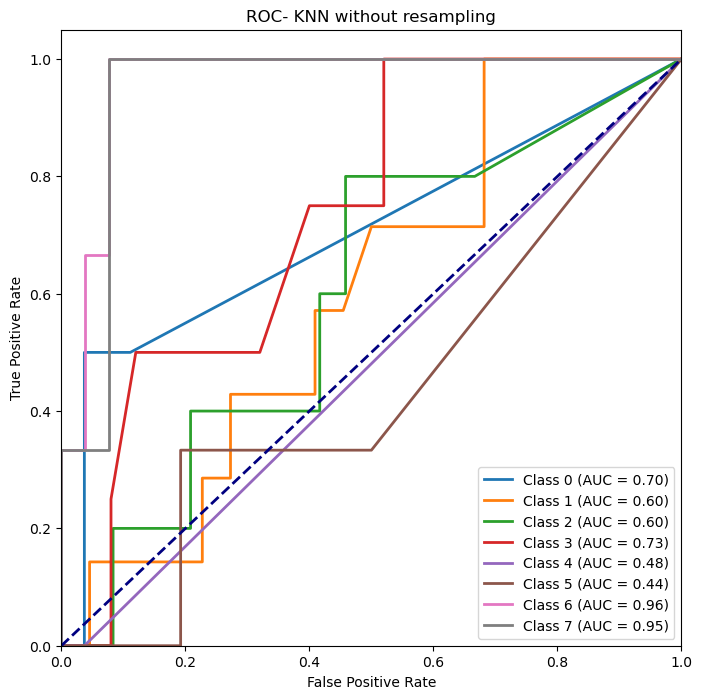

In [31]:
# KNN - Without resampling
knnc = KNeighborsClassifier()

# Testing hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  
    'weights': ['uniform', 'distance'], 
    'p': [1, 2],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=knnc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Hyperparameters", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_knn = best_model.predict(X_test)
y_probs_knn = best_model.predict_proba(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN accuracy: {knn_accuracy * 100:.2f}%")

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=best_model.classes_)

# ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(best_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC- KNN without resampling')
plt.legend(loc='lower right')
plt.show()

Hyperparameters {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
KNN accuracy: 37.93%


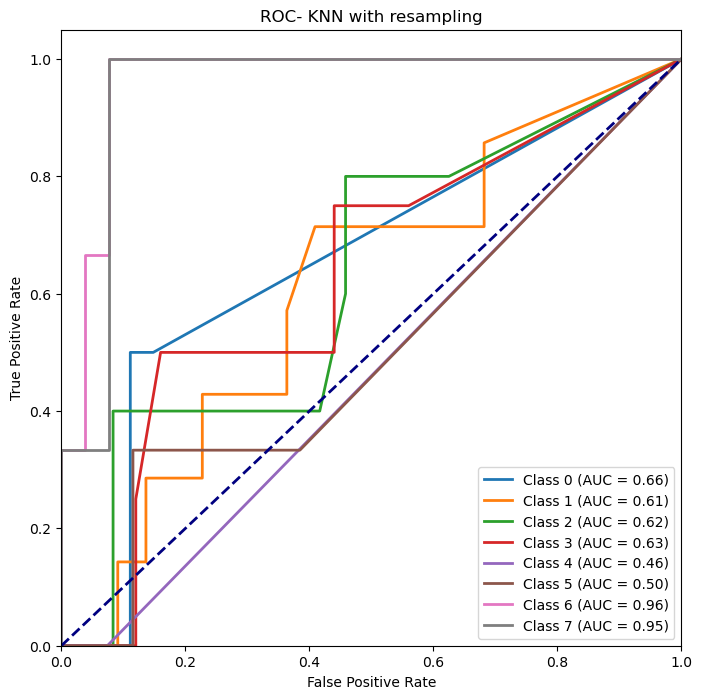

In [32]:
# KNN - With resampling
knnc_rs = KNeighborsClassifier()

# Testing hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  
    'weights': ['uniform', 'distance'], 
    'p': [1, 2],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=knnc_rs, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print("Hyperparameters", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_knn_rs = best_model.predict(X_test)
y_probs_knn = best_model.predict_proba(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn_rs)
print(f"KNN accuracy: {knn_accuracy * 100:.2f}%")

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=best_model.classes_)

# ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(best_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC- KNN with resampling')
plt.legend(loc='lower right')
plt.show()


Hyperparameters {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree accuracy: 37.93%


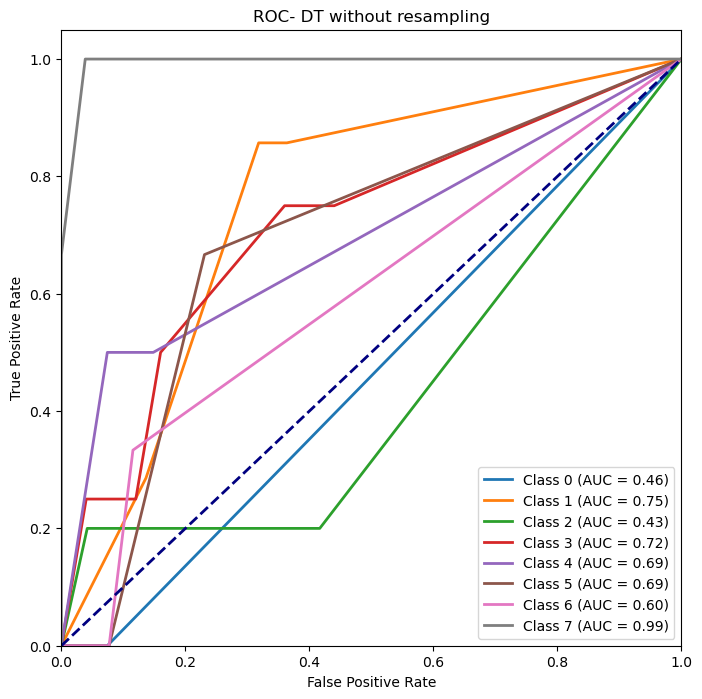

In [33]:
# Decision Tree - Without resampling
dtc = DecisionTreeClassifier(random_state=42)

# Testing hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30],
    'min_samples_split': [2, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [0, 1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Hyperparameters", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_dt = best_model.predict(X_test)
y_probs_dt = best_model.predict_proba(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree accuracy: {dt_accuracy * 100:.2f}%")

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=best_model.classes_)

# ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_dt[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(best_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC- DT without resampling')
plt.legend(loc='lower right')
plt.show()


Hyperparameters {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree accuracy: 27.59%


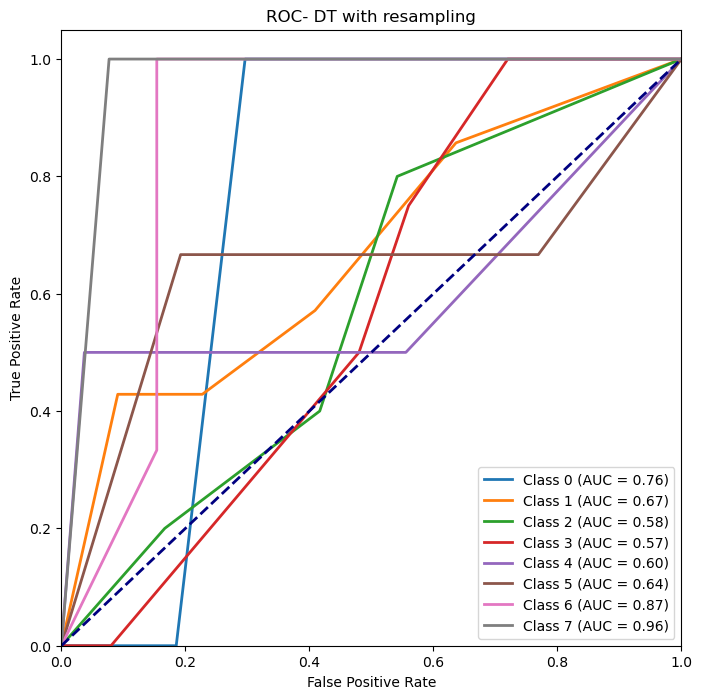

In [34]:
# Decision Tree - With resampling
dtc_rs = DecisionTreeClassifier(random_state=42)

# Testing hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30],
    'min_samples_split': [2, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [0, 1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=dtc_rs, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print("Hyperparameters", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_dt_rs = best_model.predict(X_test)
y_probs_dt = best_model.predict_proba(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt_rs)
print(f"Decision Tree accuracy: {dt_accuracy * 100:.2f}%")

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=best_model.classes_)

# ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_dt[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(best_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC- DT with resampling')
plt.legend(loc='lower right')
plt.show()


Hyperparameters {'C': 1, 'kernel': 'rbf'}
SVM accuracy: 34.48%


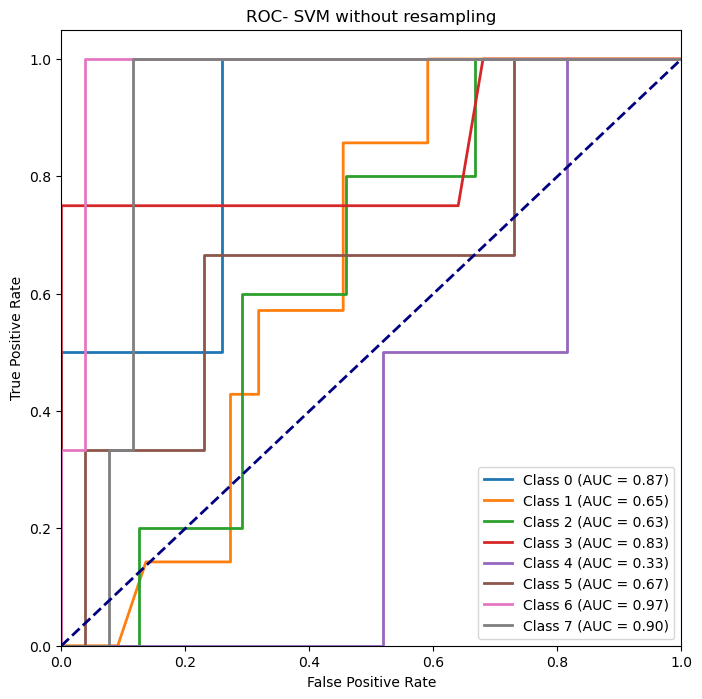

In [35]:
# SVM - Without resampling
svm_model = SVC(probability=True)

# Testing hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Hyperparameters", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_svm = best_model.predict(X_test)
y_probs_svm = best_model.predict_proba(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM accuracy: {svm_accuracy * 100:.2f}%")

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=best_model.classes_)

# ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_svm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(best_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC- SVM without resampling')
plt.legend(loc='lower right')
plt.show()


Hyperparameters {'C': 1, 'kernel': 'rbf'}
SVM accuracy: 34.48%


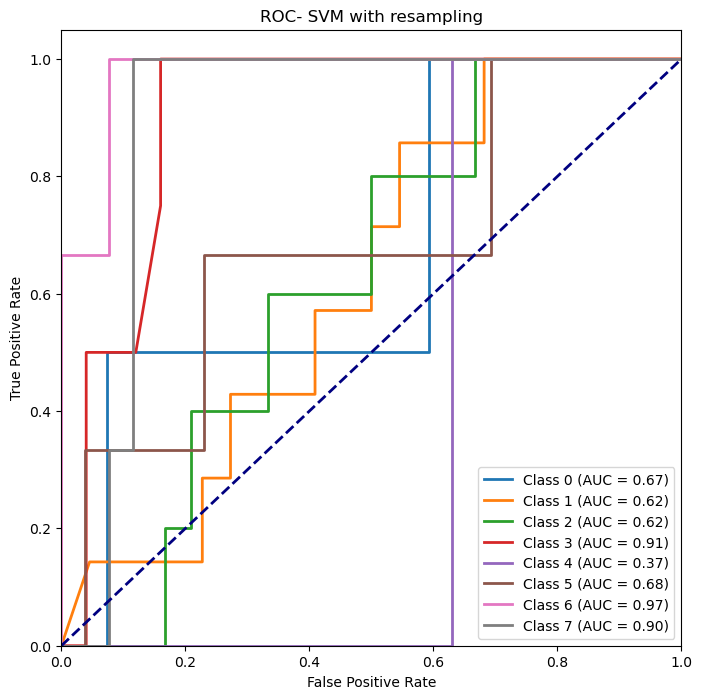

In [36]:
# SVM - With resampling
svm_model_rs = SVC(probability=True)

# Testing hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=svm_model_rs, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print("Hyperparameters", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_svm_rs = best_model.predict(X_test)
y_probs_svm = best_model.predict_proba(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm_rs)
print(f"SVM accuracy: {svm_accuracy * 100:.2f}%")

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=best_model.classes_)

# ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_svm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(best_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC- SVM with resampling')
plt.legend(loc='lower right')
plt.show()


In [37]:
# RNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for RNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# RNN model
model = Sequential()
model.add(SimpleRNN(units = 30, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(units=30, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

# Train
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


2023-12-18 11:05:12.424975: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3/3 [==============================] - 0s 42ms/step - loss: 3.5587 - accuracy: 0.0978 - val_loss: 3.5516 - val_accuracy: 0.1250
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 3.4976 - accuracy: 0.0978 - val_loss: 3.5086 - val_accuracy: 0.1250
Epoch 3/10
3/3 [==============================] - 0s 4ms/step - loss: 3.4431 - accuracy: 0.1087 - val_loss: 3.4678 - val_accuracy: 0.1250
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 3.3885 - accuracy: 0.1087 - val_loss: 3.4276 - val_accuracy: 0.1250
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 3.3340 - accuracy: 0.1196 - val_loss: 3.3883 - val_accuracy: 0.1250
Epoch 6/10
3/3 [==============================] - 0s 5ms/step - loss: 3.2827 - accuracy: 0.1196 - val_loss: 3.3497 - val_accuracy: 0.1250
Epoch 7/10
3/3 [==============================] - 0s 5ms/step - loss: 3.2307 - accuracy: 0.1304 - val_loss: 3.3124 - val_accuracy: 0.1250
Epoch 8/10
3/3 [============================

### The outcome <a name="Theoutcome"></a>
The ML models utilized for this stage include Logistic Regression, Random Forest, KNN, Decision Tree, and SVM. Each of these models was employed to make predictions both with and without oversampling. Additionally, GridSearch was applied to find the best hyperparameters, to achieve the highest possible accuracy with different parameter combinations.

The following are the accuracy rate for each model:

| Model | Without Resampling (%) | With Resampling (%) |
| --- | --- | --- |
| Logistic Regression | 24.14 | 37.93 |
| Random Forest | 44.83 | 24.14 |
| KNN | 31.03 | 37.93 |
| Decision Tree | 37.93 | 27.59 |
| SVM | 34.48 | 34.48 |

Models such as Random Forest and Decision Tree do not shows a significant improvement in accuracy with resampling, while KNN and Logistic Regression perform notably better with resampling. In the case of SVM, the accuracy levels remain constant in both instances. Despite the lower accuracy levels, an analysis of the ROC curves reveals a gradual increase in the true positive values of the target variable predictions.

## Evaluation <a name="Evaluation"></a>
After inputting the training data into the predictive models, it is essential to assess the performance of each model to identify the best-performing one, considering that not every model excels using the same methods. During evaluation, predictions are compared with actual variable values, and precision and recall are calculated.

<b>Note:</b> Due to an issue with the seaborn version (which would also require downgrading the Python version to resolve), only the annotations in the first row are displayed in confusion matrices.

### The goal <a name="Thegoal"></a>
Evaluating each models performance using confusion matrix, classification report and cross validation.

### The code <a name="Thecode"></a>

In [40]:
# Import modules
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Grade classes are extracted form the 'OUTPUT grade' in the given dataset
grade_class = ['Fail', 'DD', 'DC', 'CC', 'CB', 'BB', 'BA', 'AA'] 

Logistic Regression Confusion Matrix without resampling
 [[0 2 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]]
Logistic Regression Confusion Matrix with resampling
 [[0 1 1 0 0 0 0 0]
 [1 4 1 0 0 0 1 0]
 [0 4 1 0 0 0 0 0]
 [0 1 0 2 0 1 0 0]
 [0 1 0 1 0 0 0 0]
 [0 2 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 2]]


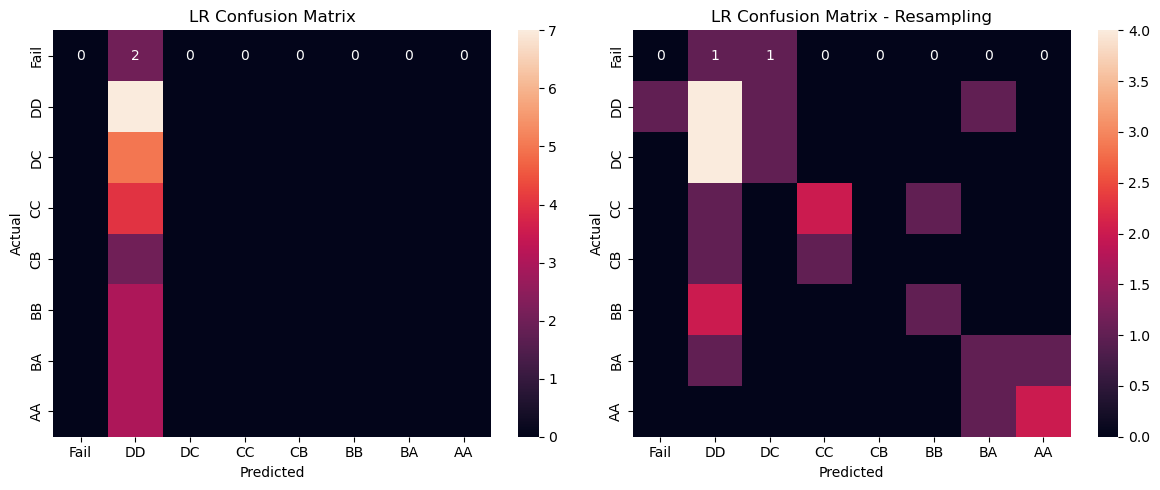

In [41]:
# Logistic Regression - Confusion matrix without resampling
cm_logreg = confusion_matrix(y_test, y_pred_logistic_reg_grid)
print("Logistic Regression Confusion Matrix without resampling\n", cm_logreg)

# with resampling
cm_logreg_rs = confusion_matrix(y_test, y_pred_logistic_reg_grid_rs)
print("Logistic Regression Confusion Matrix with resampling\n", cm_logreg_rs)

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix heatmap without resampling
sns.heatmap(cm_logreg, annot=True, xticklabels=grade_class, yticklabels=grade_class, ax=axes[0])
axes[0].set_title("LR Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Confusion matrix heatmap with resampling
sns.heatmap(cm_logreg_rs, annot=True, xticklabels=grade_class, yticklabels=grade_class, ax=axes[1])
axes[1].set_title("LR Confusion Matrix - Resampling")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

RFS Confustion Matrix without resampling
 [[0 1 1 0 0 0 0 0]
 [0 7 0 0 0 0 0 0]
 [0 3 1 1 0 0 0 0]
 [0 1 1 2 0 0 0 0]
 [0 1 0 1 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 1]
 [0 1 0 0 0 0 0 2]]
RFS Confusion Matrix with resampling
 [[0 1 1 0 0 0 0 0]
 [0 5 2 0 0 0 0 0]
 [0 5 0 0 0 0 0 0]
 [0 2 0 1 0 1 0 0]
 [0 1 0 1 0 0 0 0]
 [0 2 1 0 0 0 0 0]
 [0 2 0 1 0 0 0 0]
 [0 0 0 0 0 0 2 1]]


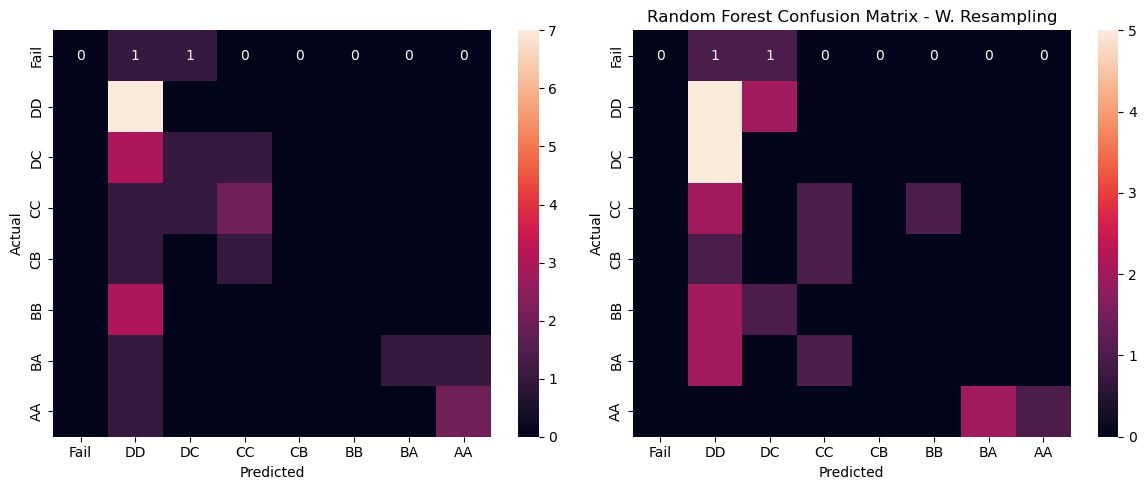

In [42]:
# RFS - Confusion matrix without resampling
cm_rfs = confusion_matrix(y_test, y_pred_rf)
print("RFS Confustion Matrix without resampling\n", cm_rfs)

# with resampling
cm_rfs_rs = confusion_matrix(y_test, y_pred_rf_rs)
print("RFS Confusion Matrix with resampling\n", cm_rfs_rs)

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix heatmap without resampling
sns.heatmap(cm_rfs, annot=True, xticklabels=grade_class, yticklabels=grade_class, ax=axes[0])
plt.title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Confusion matrix heatmap with resampling
sns.heatmap(cm_rfs_rs, annot=True, xticklabels=grade_class, yticklabels=grade_class, ax=axes[1])
plt.title("Random Forest Confusion Matrix - W. Resampling")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

KNN Confustion Matrix without resampling
 [[0 2 0 0 0 0 0 0]
 [0 5 0 1 0 1 0 0]
 [0 4 0 1 0 0 0 0]
 [0 1 1 1 0 1 0 0]
 [0 1 0 1 0 0 0 0]
 [0 2 1 0 0 0 0 0]
 [0 0 0 0 0 0 2 1]
 [0 0 0 0 0 0 2 1]]
KNN Confusion Matrix with resampling
 [[0 1 1 0 0 0 0 0]
 [0 4 0 2 0 1 0 0]
 [0 2 2 1 0 0 0 0]
 [0 0 1 2 0 1 0 0]
 [0 1 0 1 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 2 1]
 [0 0 0 0 0 0 2 1]]


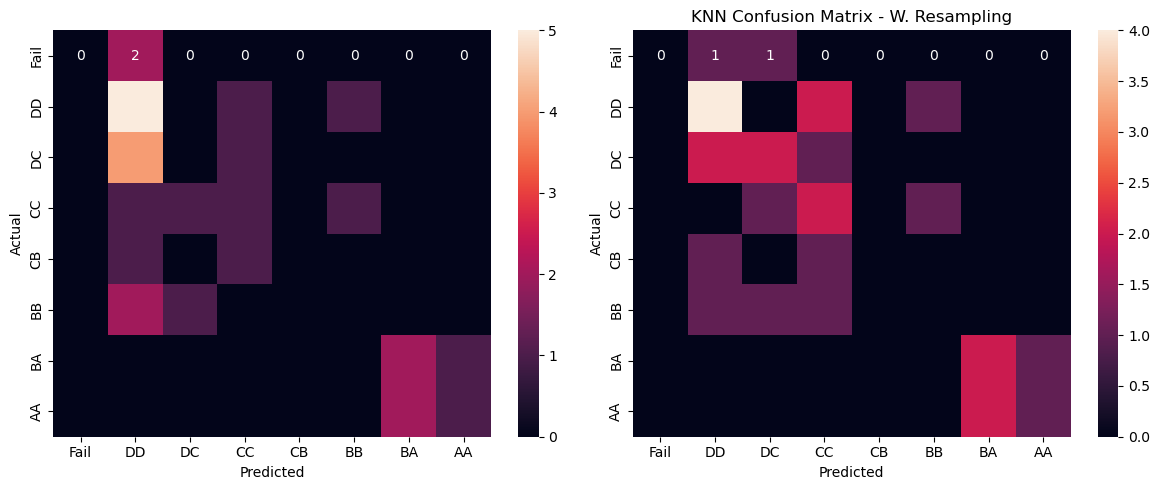

In [43]:
# KNN - Confusion matrix without resampling
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confustion Matrix without resampling\n", cm_knn)

# with resampling
cm_knn_rs = confusion_matrix(y_test, y_pred_knn_rs)
print("KNN Confusion Matrix with resampling\n", cm_knn_rs)

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix heatmap without resampling
sns.heatmap(cm_knn, annot=True, xticklabels=grade_class, yticklabels=grade_class, ax=axes[0])
plt.title("KNN Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Confusion matrix heatmap with resampling
sns.heatmap(cm_knn_rs, annot=True, xticklabels=grade_class, yticklabels=grade_class, ax=axes[1])
plt.title("KNN Confusion Matrix - W. Resampling")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

KNN Confustion Matrix without resampling
 [[0 1 1 0 0 0 0 0]
 [1 6 0 0 0 0 0 0]
 [0 3 1 0 0 1 0 0]
 [1 1 0 1 0 1 0 0]
 [0 0 1 0 1 0 0 0]
 [0 2 0 0 1 0 0 0]
 [0 0 0 2 1 0 0 0]
 [0 0 0 1 0 0 0 2]]
KNN Confusion Matrix with resampling
 [[0 2 0 0 0 0 0 0]
 [0 4 2 0 0 0 0 1]
 [0 4 1 0 0 0 0 0]
 [0 2 2 0 0 0 0 0]
 [0 1 0 1 0 0 0 0]
 [0 0 2 1 0 0 0 0]
 [2 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 3]]


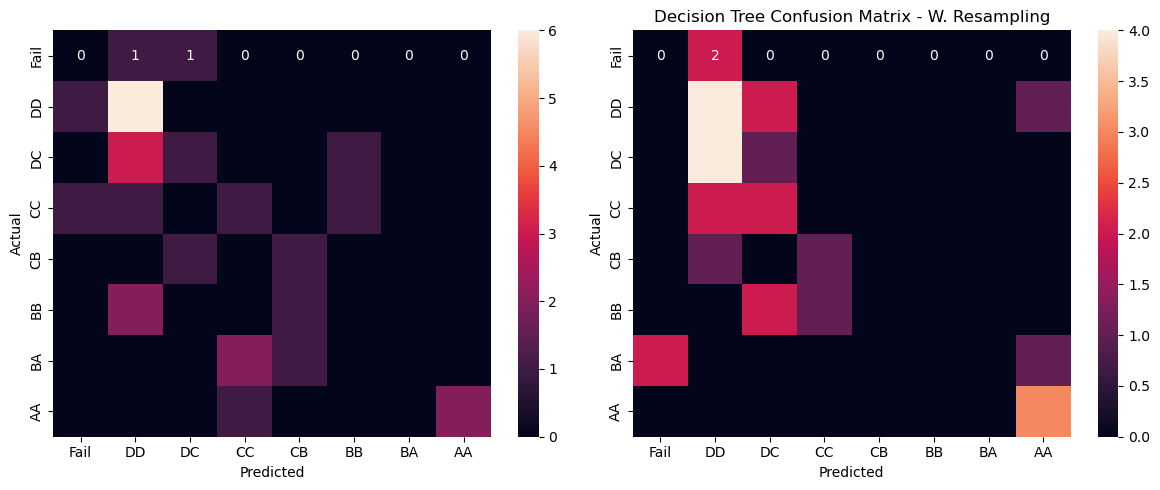

In [44]:
# Decision Tree - Confusion matrix without resampling
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("KNN Confustion Matrix without resampling\n", cm_dt)

# with resampling
cm_dt_rs = confusion_matrix(y_test, y_pred_dt_rs)
print("KNN Confusion Matrix with resampling\n", cm_dt_rs)

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix heatmap without resampling
sns.heatmap(cm_dt, annot=True, xticklabels=grade_class, yticklabels=grade_class, ax=axes[0])
plt.title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Confusion matrix heatmap with resampling
sns.heatmap(cm_dt_rs, annot=True, xticklabels=grade_class, yticklabels=grade_class, ax=axes[1])
plt.title("Decision Tree Confusion Matrix - W. Resampling")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

KNN Confustion Matrix without resampling
 [[0 2 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0]
 [0 2 0 0 0 2 0 0]
 [0 1 0 1 0 0 0 0]
 [0 2 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 3]
 [0 0 0 0 0 1 0 2]]
KNN Confusion Matrix with resampling
 [[0 2 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0]
 [0 2 0 0 0 2 0 0]
 [0 1 0 1 0 0 0 0]
 [0 2 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 3]
 [0 0 0 0 0 1 0 2]]


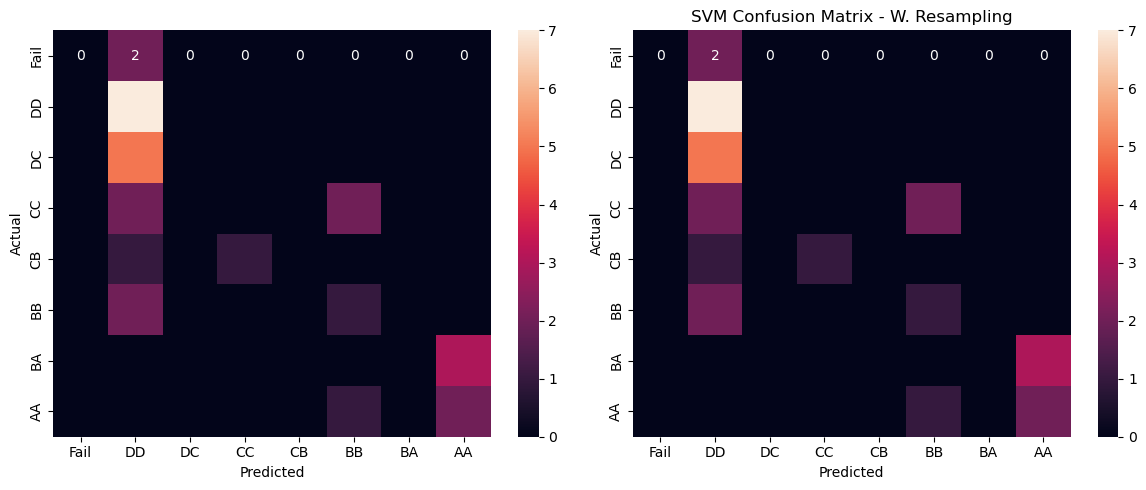

In [45]:
# SVM - Confusion matrix without resampling
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("KNN Confustion Matrix without resampling\n", cm_svm)

# with resampling
cm_svm_rs = confusion_matrix(y_test, y_pred_svm_rs)
print("KNN Confusion Matrix with resampling\n", cm_svm_rs)

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix heatmap without resampling
sns.heatmap(cm_svm, annot=True, xticklabels=grade_class, yticklabels=grade_class, ax=axes[0])
plt.title("SVM Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Confusion matrix heatmap with resampling
sns.heatmap(cm_svm_rs, annot=True, xticklabels=grade_class, yticklabels=grade_class, ax=axes[1])
plt.title("SVM Confusion Matrix - W. Resampling")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [46]:
# Classification report - without Sampling
print("Logistic Regression\n", classification_report(y_test, y_pred_logistic_reg_grid))
print("Random Forest Search\n", classification_report(y_test, y_pred_rf))
print("K-Nearest Neighbour\n", classification_report(y_test, y_pred_knn))
print("Decision Trees\n", classification_report(y_test, y_pred_dt))
print("SVM\n", classification_report(y_test, y_pred_svm))

Logistic Regression
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.24      1.00      0.39         7
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3

    accuracy                           0.24        29
   macro avg       0.03      0.12      0.05        29
weighted avg       0.06      0.24      0.09        29

Random Forest Search
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.39      1.00      0.56         7
           2       0.33      0.20      0.25         5
           3       0.50      0.50      0.50         4
           4       0.00      0.00  

In [47]:
# Classification report - with Sampling
print("Logistic Regression\n", classification_report(y_test, y_pred_logistic_reg_grid_rs))
print("Random Forest Search\n", classification_report(y_test, y_pred_rf_rs))
print("K-Nearest Neighbour\n", classification_report(y_test, y_pred_knn_rs))
print("Decision Trees\n", classification_report(y_test, y_pred_dt_rs))
print("SVM\n", classification_report(y_test, y_pred_svm_rs))

Logistic Regression
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.29      0.57      0.38         7
           2       0.33      0.20      0.25         5
           3       0.67      0.50      0.57         4
           4       0.00      0.00      0.00         2
           5       0.50      0.33      0.40         3
           6       0.33      0.33      0.33         3
           7       0.67      0.67      0.67         3

    accuracy                           0.38        29
   macro avg       0.35      0.33      0.33        29
weighted avg       0.37      0.38      0.36        29

Random Forest Search
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.28      0.71      0.40         7
           2       0.00      0.00      0.00         5
           3       0.33      0.25      0.29         4
           4       0.00      0.00  

In [48]:
# Cross validation (Additional measure to try accuracy levels)
print("Logistic Regression")
lr_cv_scores = cross_val_score(logistic_reg, X_train, y_train, scoring = 'accuracy', cv=10)
print(f'Accuracies: {lr_cv_scores}')
print(f'Mean Accuracy: {np.mean(lr_cv_scores)}\n')

print("Logistic Regression - With Resampling")
lr_cv_scores_rs = cross_val_score(logistic_reg_rs, X_train, y_train, scoring = 'accuracy', cv=10)
print(f'Accuracies: {lr_cv_scores_rs}')
print(f'Mean Accuracy: {np.mean(lr_cv_scores_rs)}\n')

print("Random Forest Search")
rf_cv_scores = cross_val_score(rfc, X_train, y_train, scoring = 'accuracy', cv=10)
print(f'Accuracies: {rf_cv_scores}')
print(f'Mean Accuracy: {np.mean(rf_cv_scores)}\n')

print("Random Forest Search - With Resampling")
rf_cv_scores = cross_val_score(rfc_rs, X_train, y_train, scoring = 'accuracy', cv=10)
print(f'Accuracies: {rf_cv_scores}')
print(f'Mean Accuracy: {np.mean(rf_cv_scores)}\n')

print("KNN")
knn_cv_scores = cross_val_score(knnc, X_train, y_train, scoring = 'accuracy', cv=10)
print(f'Accuracies: {knn_cv_scores}')
print(f'Mean Accuracy: {np.mean(knn_cv_scores)}\n')

print("KNN - With Resampling")
knn_cv_scores = cross_val_score(knnc_rs, X_train, y_train, scoring = 'accuracy', cv=10)
print(f'Accuracies: {knn_cv_scores}')
print(f'Mean Accuracy: {np.mean(knn_cv_scores)}\n')

print("Decision Tree")
dt_cv_scores = cross_val_score(dtc, X_train, y_train, scoring = 'accuracy', cv=10)
print(f'Accuracies: {dt_cv_scores}')
print(f'Mean Accuracy: {np.mean(dt_cv_scores)}\n')

print("Decision Tree - With Resampling")
dt_cv_scores = cross_val_score(dtc_rs, X_train, y_train, scoring = 'accuracy', cv=10)
print(f'Accuracies: {dt_cv_scores}')
print(f'Mean Accuracy: {np.mean(dt_cv_scores)}\n')

print("SVM")
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, scoring = 'accuracy', cv=10)
print(f'Accuracies: {svm_cv_scores}')
print(f'Mean Accuracy: {np.mean(svm_cv_scores)}\n')

print("SVM - With Resampling")
svm_cv_scores = cross_val_score(svm_model_rs, X_train, y_train, scoring = 'accuracy', cv=10)
print(f'Accuracies: {svm_cv_scores}')
print(f'Mean Accuracy: {np.mean(svm_cv_scores)}\n')

Logistic Regression
Accuracies: [0.33333333 0.16666667 0.16666667 0.41666667 0.25       0.16666667
 0.18181818 0.18181818 0.18181818 0.27272727]
Mean Accuracy: 0.23181818181818184

Logistic Regression - With Resampling
Accuracies: [0.33333333 0.16666667 0.16666667 0.41666667 0.25       0.16666667
 0.18181818 0.18181818 0.18181818 0.27272727]
Mean Accuracy: 0.23181818181818184

Random Forest Search
Accuracies: [0.66666667 0.25       0.33333333 0.33333333 0.25       0.16666667
 0.36363636 0.18181818 0.09090909 0.27272727]
Mean Accuracy: 0.2909090909090909

Random Forest Search - With Resampling
Accuracies: [0.66666667 0.25       0.33333333 0.33333333 0.25       0.16666667
 0.36363636 0.18181818 0.09090909 0.27272727]
Mean Accuracy: 0.2909090909090909

KNN
Accuracies: [0.33333333 0.25       0.16666667 0.16666667 0.25       0.16666667
 0.27272727 0.         0.18181818 0.36363636]
Mean Accuracy: 0.21515151515151515

KNN - With Resampling
Accuracies: [0.33333333 0.25       0.16666667 0.16666

### The Outcome <a name="Theoutcome"></a>
In the evaluation as described above, graphs and tables were generated for accuracies, precision, recall, and the confusion matrix. Even after oversampling, a slight bias remains in the target variable ('OUTPUT Grade'). It is also important to note that confusion matrices with and without sampling appear similar. Therefore, the assumption is that sampling didn't have a significant impact on the performance of the models.

## Communicate Results <a name="CommunicateResults"></a>

In this machine learning model, we utilised a categorical dataset containing information about the high school performance of various students and their final grades, with the 'OUTPUT Grade' identified as the target variable. The initial steps involved visualizing the data through summary graphs, bar plots, and box plots to discover data patterns or outliers. Subsequently, during data preprocessing, we addressed null values and removed unnecessary features. Feature selection and reduction were carried out by identifying features with higher correlations with the target variable. Oversampling and later undersampling were implemented to mitigate bias during model training, where Logistic Regression, Random Forest Search, K-Nearest Neighbour, Decision Tree, SVM, and RNN were employed. The ROC curves for each model illustrate a gradual improvement in predictions.

Among the trained models, based on accuracies, it is suggested that SVM and Logistic Regression perform better than other methods. However, a closer look reveals that the Random Forest Search (without sampling) achieved higher accuracy.

**Answering Research Questions**
1) How to deal with the data imbalance in certain features?
* To address data imbalance, SMOTE was used to oversample the minority of the data, while the 'RandomUnderSampler' was used to undersample the majority of the data.

2) Will feature reduction improve accuracy?
* Feature reduction indeed improved the accuracy of each model overall. The initial run of models with all features resulted in very low accuracy for most models (under 24%).

3) What is the best fitting model out of Logistic Regression, Random Forest Search, Decision Tree, KNN, and SVM?
* Determining the best fitting model is challenging, but based on performance, Logistic Regression seems promising, demonstrating higher recall and precision rates compared to other models.

4) Does this study comply with ethical usage of data and information?
* Throughout the assessment, measures were taken to ensure the ethical usage of data, adhering to the correct license guidelines. Further details about ethical considerations are explained in the following chapter.

## Ethics <a name="Ethics"></a>
Ethical use of data is crucial, particularly when handling sensitive information such as student data collected by a research group. The 'Driven Data' website provides an ethics checklist for data science, serving as a reference for this documentation. Different ethical considerations come into play at various stages, and below, each ethical principle is elaborated on in relation to each stage.

#### Data Exploration
The exploration of the dataset marks the initial step in constructing a Machine Learning (ML) model. During this stage, the primary focus is on identifying patterns or outliers in the data relevant to stakeholders. Throughout model development, all student data remain anonymised, ensuring that no names or details that could identify the students are disclosed, thereby safeguarding student privacy.

#### Data Preprocessing
In the preprocessing stage, ethical responsibility involves handling missing values, outliers, and ensuring fairness. Potential biases in the data that might impact the model's predictions need to be addressed. During data preprocessing, the 'Student ID' feature is omitted from the dataset, ensuring complete anonymity of data. The 'Student Age' contains missing values and is imputed with the mode. In later stages, to mitigate bias and ensure fairness, resampling methods are used. Different visualisations, such as heatmaps, bar charts, and summary tables, are used to provide an honest representation of the data.

#### Feature Engineering and Feature Selection
During feature engineering and feature selection, features with high positive/negative correlations with the target variable are chosen to avoid biases during model training.

#### Select, Train, Apply ML Models
In the Select, Train, Apply ML Models stage, different algorithms are trained with fairness considerations. After splitting the data, resampling techniques are applied to minimise class imbalance. A grid search is carried out with different parameters (parameter optimisation) in possible models.

#### Evaluation
Cross-validation techniques and confusion matrices are used to compare and contrast different accuracies and scoring of different models.

Throughout these stages, the dataset's licensing terms and steps maintaining the ethicality of data are meticulously followed. This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license, allowing for the sharing and adaptation of datasets for any purpose, provided that the appropriate credit is given.

## References<a name="References"></a>

1) IBM (2023). What is Machine Learning? [online] IBM. Available at: https://www.ibm.com/topics/machine-learning.</br>
2) David, Davis (2021). Machine Learning Tutorial – Feature Engineering and Feature Selection For Beginners. [online] Available at: https://www.freecodecamp.org/news/feature-engineering-and-feature-selection-for-beginners/.
3) Jason Brownlee (2021). How to Combine Oversampling and Undersampling for Imbalanced Classification. [online] Available at: https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/.
4) Yilmaz,Nevriye and Şekeroğlu,Boran. (2023). Higher Education Students Performance Evaluation. UCI Machine Learning Repository. https://doi.org/10.24432/C51G82.
5) Deon. An ethics checklist for data scientists. Available at: https://deon.drivendata.org/#data-science-ethics-checklist (Accessed: 16 December 2023). 